# Code Challenge - Credit Card Customers Prediction

***
*Author: Kadriye Nur Bakirci*
***
Contact regarding the code: nur.bakirci@gmail.com
***

This notebook solves credit card customer churn prediction task given 1 tabular datasets.

This notebook is divided into 9 main sections.



1.   **Environment Setup**
2.   **Data Preparation**
3.   **Exploratory Data Analysis**
4.   **Customer Churn Analysis**
5.   **Feature Engineering**
6.   **Data Preprocessing**
7.   **Correlation Analysis**
8.   **Data Preparation for ML**
9.   **Model Implementation**

[Datasets Location](https://www.kaggle.com/datasets/whenamancodes/credit-card-customers-prediction?resource=download)

## Prepare the Environment

### Import Libraries

General Use Libraries

In [1]:
# Import important libraries
import pandas as pd
import numpy as np

# Libraries for graphs
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.offline import iplot
sns.set()
import plotly.express as px

# Library for statistical test
import statsmodels.api as sm
from sklearn.feature_selection import chi2

# Data Preprocessing Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Performance Metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Predictive Models
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Model Selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Kfold parameters are imported for checking model accuracy
from sklearn.model_selection import KFold, cross_val_score

# Plot feature importance
from xgboost import plot_importance

# Define some rules of displaying DataFrame
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 1000)
pd.set_option('max_colwidth', None)

### Import the Data

Clone repository containing the data.

In [2]:
# Clone the repo containing the raw data
!git clone -l -s https://github.com/kadnur/CreditCardCustomerPrediction.git cloned-repo

Cloning into 'cloned-repo'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 11 (delta 1), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (11/11), 371.70 KiB | 1.74 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [3]:
# Move to the relative path containing the cloned repo's data
%cd cloned-repo/Data
!ls

/content/cloned-repo/Data
BankChurners.csv


Convert the dataset files into Pandas Dataframes.

**DataFrame 1** : *BankChurners*

In [4]:
# Read BankChurners csv data file
BankChurners = pd.read_csv('BankChurners.csv')

## Data Preparation

### BankChurners - Analysis

Explore the first 10 instances of BankChurners.

In [5]:
# Check the head as a sanity check of correct loading of the data
BankChurners.head(10)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   
5  713061558  Existing Customer            44      M                2   
6  810347208  Existing Customer            51      M                4   
7  818906208  Existing Customer            32      M                0   
8  710930508  Existing Customer            37      M                3   
9  719661558  Existing Customer            48      M                2   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   
5        Graduate        Married     $40K - $60K          Blue   
6         Unknown        Married         $120K +          Gold   
7     High School        Unknown     $60K - $80K        Silver   
8      Uneducated         Single     $60K - $80K          Blue   
9        Graduate         Single    $80K - $120K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   
5              36                         3                       1   
6              46                         6                       1   
7              27                         2                       2   
8              36                         5                       2   
9              36                         6                       3   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3       12691.0                  777          11914.0   
1                      2        8256.0                  864           7392.0   
2                      0        3418.0                    0           3418.0   
3                      1        3313.0                 2517            796.0   
4                      0        4716.0                    0           4716.0   
5                      2        4010.0                 1247           2763.0   
6                      3       34516.0                 2264          32252.0   
7                      2       29081.0                 1396          27685.0   
8                      0       22352.0                 2517          19835.0   
9                      3       11656.0                 1677           9979.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   
5                 1.376             1088              24                0.846   
6                 1.975             1330              31                0.722   
7                 2.204             1538              36                0.714   
8                 3.355             1350              24                1.182   

Get an overall insight on BankChurners dataframe content.

In [6]:
# Get the shape of the DataFrame
print(f'Dataset shape:\n{BankChurners.shape}\n')

# Get the names of the attributes
print(f'Dataset attributes:\n{BankChurners.columns}\n')

# Get the overall description of the dataset with the data types
print(f'Dataset general information:\n{BankChurners.info()}\n')

# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{BankChurners.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{BankChurners.describe(include = object).transpose()}')

Dataset shape:
(10127, 23)

Dataset attributes:
Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                

Do a direct call for printing missing values.

In [7]:
# Check for the percentage of missing values per feature
print(f'Percentage of Null Values per Feature\n{((BankChurners.isnull().sum() / len(BankChurners))) * 100}\n')

Percentage of Null Values per Feature
CLIENTNUM                                                                                                                             0.0
Attrition_Flag                                                                                                                        0.0
Customer_Age                                                                                                                          0.0
Gender                                                                                                                                0.0
Dependent_count                                                                                                                       0.0
Education_Level                                                                                                                       0.0
Marital_Status                                                                                                                        

We don't have any missing value so there is no need for any implementation of handling missing value techniques.

## Exploratory Data Analysis

Create copy of the raw data before making transformations.

In [8]:
# Make a copy of the raw datasets to keep the original information untouched
df_bankchurners= BankChurners.copy()

Now before going any further let's check all data types are correct.

In [9]:
# Check data types are correct or not
df_bankchurners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [10]:
# Let's change some of float category types to integer
change_column = ['Customer_Age','Months_on_book','Credit_Limit','Avg_Open_To_Buy','Total_Trans_Ct']
for column in change_column:
  df_bankchurners[column] = df_bankchurners[column].astype(int)

#Check dataframe again
df_bankchurners.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3         12691                  777            11914   
1                      2          8256                  864             7392   
2                      0          3418                    0             3418   
3                      1          3313                 2517              796   
4                      0          4716                    0             4716   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                                                                                                            0.000093   
1                                                                                                                            0.000057   
2                                                                                                                            0.000021   
3                                                                                                                            0.000134   
4                                                                                                                            0.000022   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                                                                                                             0.99991  
1                                                                                                                             0.99994  
2                                                                                                                             0.99998  
3                                                                                                                             0.99987  
4                                                                                                   

### Duplicated Instances

Check the number of duplicated rows in DataFrame.

In [11]:
# Print the number of duplicated rows for df_transaction_data
print(f'The number of duplicated rows in logs DataFrame is {df_bankchurners.duplicated().sum()} out of {df_bankchurners.shape[0]} rows.')

The number of duplicated rows in logs DataFrame is 0 out of 10127 rows.


There is no duplicated observation.

### Subset Dataset

Drop the irrelevant columns.

In [12]:
# Check column names
df_bankchurners.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [13]:
# Create subset of dataset
df_bankchurners = df_bankchurners[['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']]

### Dataset Binning

Create bins for customer age feature.

In [14]:
# Create bins and labels
bins = [25, 30, 45, 50, 60, 70, 80]
labels = ['20s', '30s', '40s', '50s', '60s', '70s']
df_bankchurners['Customer_Age_Bins'] = pd.cut(df_bankchurners['Customer_Age'], bins=bins, labels=labels, include_lowest=True, right=False)

<ipython-input-14-ffd5726cd688>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Sanity Checks

Check in the dataset %16 customers are attrited

In [15]:
# Check the value counts in the feature attrition flag
df_bankchurners['Attrition_Flag'].value_counts()['Attrited Customer'] / df_bankchurners.shape[0]

0.1606596227905599

In [16]:
# Print the value
print(round(df_bankchurners['Attrition_Flag'].value_counts()['Attrited Customer'] / df_bankchurners.shape[0] * 100, 2), "% of our customers have churned")

16.07 % of our customers have churned


### Summary Statistics

Check the some statistics could be useful.

In [17]:
# Print the average number of relationships a customer
print("The average total relationship count is", round(np.mean(df_bankchurners['Total_Relationship_Count']),2),
      "and the median is",round(np.median(df_bankchurners['Total_Relationship_Count']),2) )

The average total relationship count is 3.81 and the median is 4.0


In [18]:
# Print the average credit limit
print("The average credit limit is", round(np.mean(df_bankchurners['Credit_Limit']),2),
      "and the median is",round(np.median(df_bankchurners['Credit_Limit']),2) )

The average credit limit is 8631.94 and the median is 4549.0


In [19]:
# Print the longest customer
print("The longest customer is", np.max(df_bankchurners['Months_on_book']), "months.")

The longest customer is 56 months.


Check the distributions.

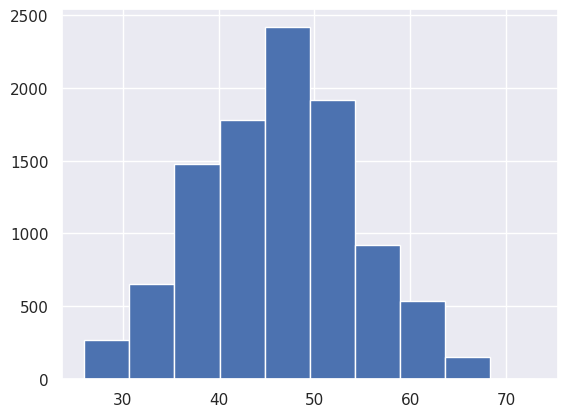

In [20]:
# Check customer age distribution
plt.hist(df_bankchurners['Customer_Age']);

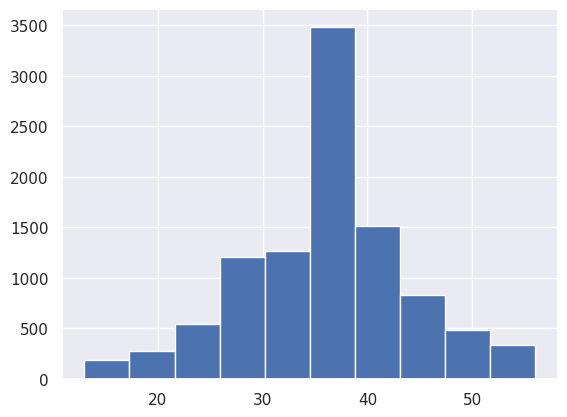

In [21]:
# Check months on book distribution
plt.hist(df_bankchurners['Months_on_book']);

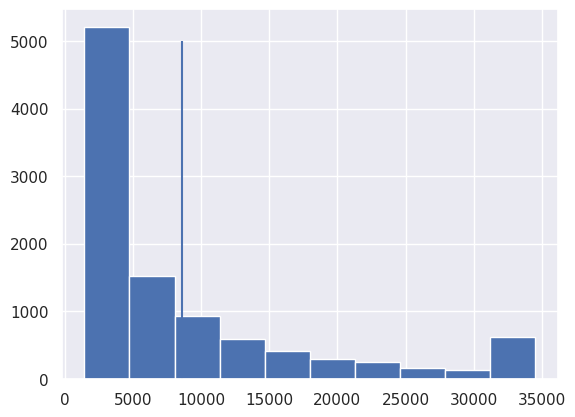

In [22]:
# Check credit limit distribution
plt.hist(df_bankchurners['Credit_Limit'])
plt.vlines(df_bankchurners['Credit_Limit'].mean(),0,5000)
plt.vlines(df_bankchurners['Credit_Limit'].median(),0,5000);

Improve the graph so that we can get better analysis.

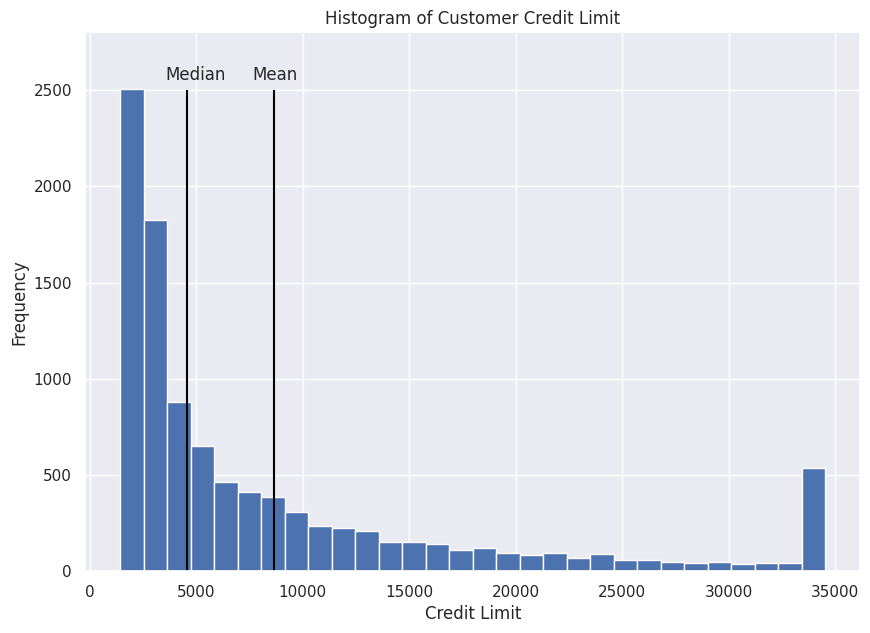

In [23]:
# Improve the credit limit histogram
plt.figure(figsize=(10,7))
plt.hist(df_bankchurners['Credit_Limit'],bins=30)

plt.vlines(df_bankchurners['Credit_Limit'].mean(),0,2500, colors='Black')
plt.vlines(df_bankchurners['Credit_Limit'].median(),0,2500, colors='Black')
plt.text(df_bankchurners['Credit_Limit'].mean()-1000,2500+50,"Mean")
plt.text(df_bankchurners['Credit_Limit'].median()-1000,2500+50,"Median")
plt.ylim(0,2800)
plt.title("Histogram of Customer Credit Limit")
plt.ylabel("Frequency")
plt.xlabel("Credit Limit");

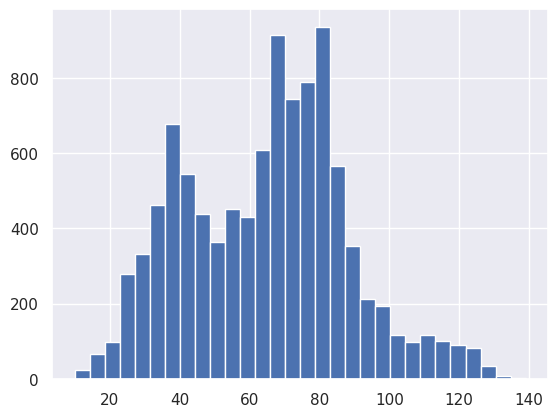

In [24]:
# Plot total transaction distribution
plt.hist(df_bankchurners['Total_Trans_Ct'],bins=30);

<Axes: xlabel='Gender', ylabel='Total_Trans_Ct'>

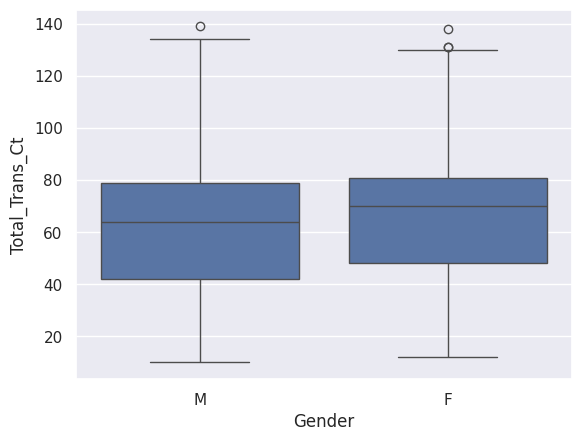

In [25]:
# Create a boxplot of total transaction per gender
sns.boxplot(x=df_bankchurners['Gender'], y=df_bankchurners['Total_Trans_Ct'])

In [26]:
# Create pyramid chart
pyramid = df_bankchurners.groupby(['Gender','Customer_Age_Bins'])['CLIENTNUM'].nunique().reset_index()
pyramid

Gender Customer_Age_Bins  CLIENTNUM
0       F               20s         93
1       F               30s       2083
2       F               40s       1283
3       F               50s       1619
4       F               60s        280
5       F               70s          0
6       M               20s        102
7       M               30s       1897
8       M               40s       1139
9       M               50s       1379
10      M               60s        250
11      M               70s          2

In [27]:
women_bins = np.array(-1* pyramid[pyramid['Gender']=='F']['CLIENTNUM'])
men_bins = np.array(pyramid[pyramid['Gender']=='M']['CLIENTNUM'])

y = list(range(20, 100, 10))

layout = go.Layout(yaxis=go.layout.YAxis(title='Age'),
                   xaxis=go.layout.XAxis(
                       range=[-3000, 3000],
                       tickvals=[-2500,-2000,-1500,-1000,-500, 0, 500,1000,1500,2000,2500],
                       ticktext=[2500,2000,1500,1000,500, 0, 500,1000,1500,2000,2500],
                       title='Customers'),
                   barmode='overlay',
                   bargap=0.1)

p_data = [go.Bar(y=y,
               x=men_bins,
               orientation='h',
               name='Men',
               hoverinfo='x',
               marker=dict(color='powderblue')
               ),
        go.Bar(y=y,
               x=women_bins,
               orientation='h',
               name='Women',
               text=-1 * women_bins.astype('int'),
               hoverinfo='text',
               marker=dict(color='seagreen')
               )]

iplot(dict(data=p_data, layout=layout))

Here we see there is no real difference in the distribution of Customers by Age and Gender. The majority of customers are in their 40s--a similar finding to the one earlier when we were looking at histograms.

### Comparing Categories

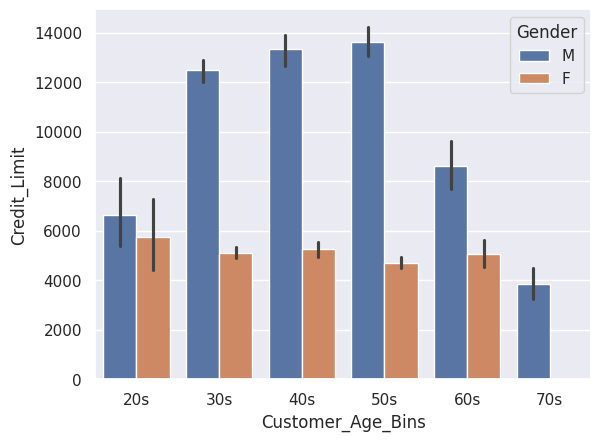

In [28]:
# Create bar chart for credit limits
sns.barplot(x="Customer_Age_Bins", y="Credit_Limit", data=df_bankchurners, estimator="mean",hue="Gender");

In [29]:
# Grouped data
bar_plot = df_bankchurners.groupby(['Customer_Age_Bins','Gender'])['Credit_Limit'].mean().reset_index()

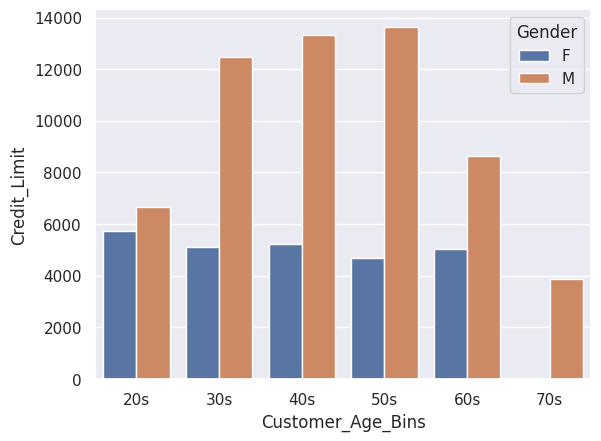

In [30]:
# Re-create bar plout again with the grouped dataset
sns.barplot(x="Customer_Age_Bins", y="Credit_Limit", data=bar_plot, estimator="mean",hue="Gender");

### Data Tables

In [31]:
# Group the dataset
data_pivot = df_bankchurners.groupby(['Attrition_Flag']).agg({"CLIENTNUM":"nunique",
                                         "Customer_Age":"mean",
                                         'Dependent_count': 'mean',
                                          'Months_on_book': 'mean',
                                          'Total_Relationship_Count': 'mean',
                                          'Months_Inactive_12_mon': 'mean',
                                          'Contacts_Count_12_mon': 'mean',
                                          'Credit_Limit': 'mean',
                                          'Total_Revolving_Bal': 'mean',
                                          'Avg_Open_To_Buy': 'mean',
                                          'Total_Amt_Chng_Q4_Q1': 'mean',
                                          'Total_Trans_Amt': 'mean',
                                          'Total_Trans_Ct': 'mean',
                                          'Total_Ct_Chng_Q4_Q1': 'mean',
                                          'Avg_Utilization_Ratio': 'mean'}).T
data_pivot

Attrition_Flag            Attrited Customer  Existing Customer
CLIENTNUM                       1627.000000        8500.000000
Customer_Age                      46.659496          46.262118
Dependent_count                    2.402581           2.335412
Months_on_book                    36.178242          35.880588
Total_Relationship_Count           3.279656           3.914588
Months_Inactive_12_mon             2.693301           2.273765
Contacts_Count_12_mon              2.972342           2.356353
Credit_Limit                    8136.016595        8726.864000
Total_Revolving_Bal              672.822987        1256.604118
Avg_Open_To_Buy                 7463.193608        7470.259882
Total_Amt_Chng_Q4_Q1               0.694277           0.772510
Total_Trans_Amt                 3095.025814        4654.655882
Total_Trans_Ct                    44.933620          68.672588
Total_Ct_Chng_Q4_Q1                0.554386           0.742434
Avg_Utilization_Ratio              0.162475           0.296412

In [32]:
# Calculate differences column
data_pivot['Diff'] = data_pivot['Attrited Customer'] /  data_pivot['Existing Customer'] - 1

# Sort DataFrame
data_pivot.sort_values("Diff")

Attrition_Flag            Attrited Customer  Existing Customer      Diff
CLIENTNUM                       1627.000000        8500.000000 -0.808588
Total_Revolving_Bal              672.822987        1256.604118 -0.464570
Avg_Utilization_Ratio              0.162475           0.296412 -0.451860
Total_Trans_Ct                    44.933620          68.672588 -0.345683
Total_Trans_Amt                 3095.025814        4654.655882 -0.335069
Total_Ct_Chng_Q4_Q1                0.554386           0.742434 -0.253286
Total_Relationship_Count           3.279656           3.914588 -0.162196
Total_Amt_Chng_Q4_Q1               0.694277           0.772510 -0.101271
Credit_Limit                    8136.016595        8726.864000 -0.067704
Avg_Open_To_Buy                 7463.193608        7470.259882 -0.000946
Months_on_book                    36.178242          35.880588  0.008296
Customer_Age                      46.659496          46.262118  0.008590
Dependent_count                    2.402581           2.335412  0.028761
Months_Inactive_12_mon             2.693301           2.273765  0.184512
Contacts_Count_12_mon              2.972342           2.356353  0.261416

### Data Relationships

In [33]:
# Simply dataset only numeric ones
numeric_data = df_bankchurners._get_numeric_data()

# Check numeric data colums
numeric_data.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [34]:
# Select the relevant features
numeric_data = df_bankchurners[['Customer_Age', 'Months_on_book',
       'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio','Attrition_Flag']]

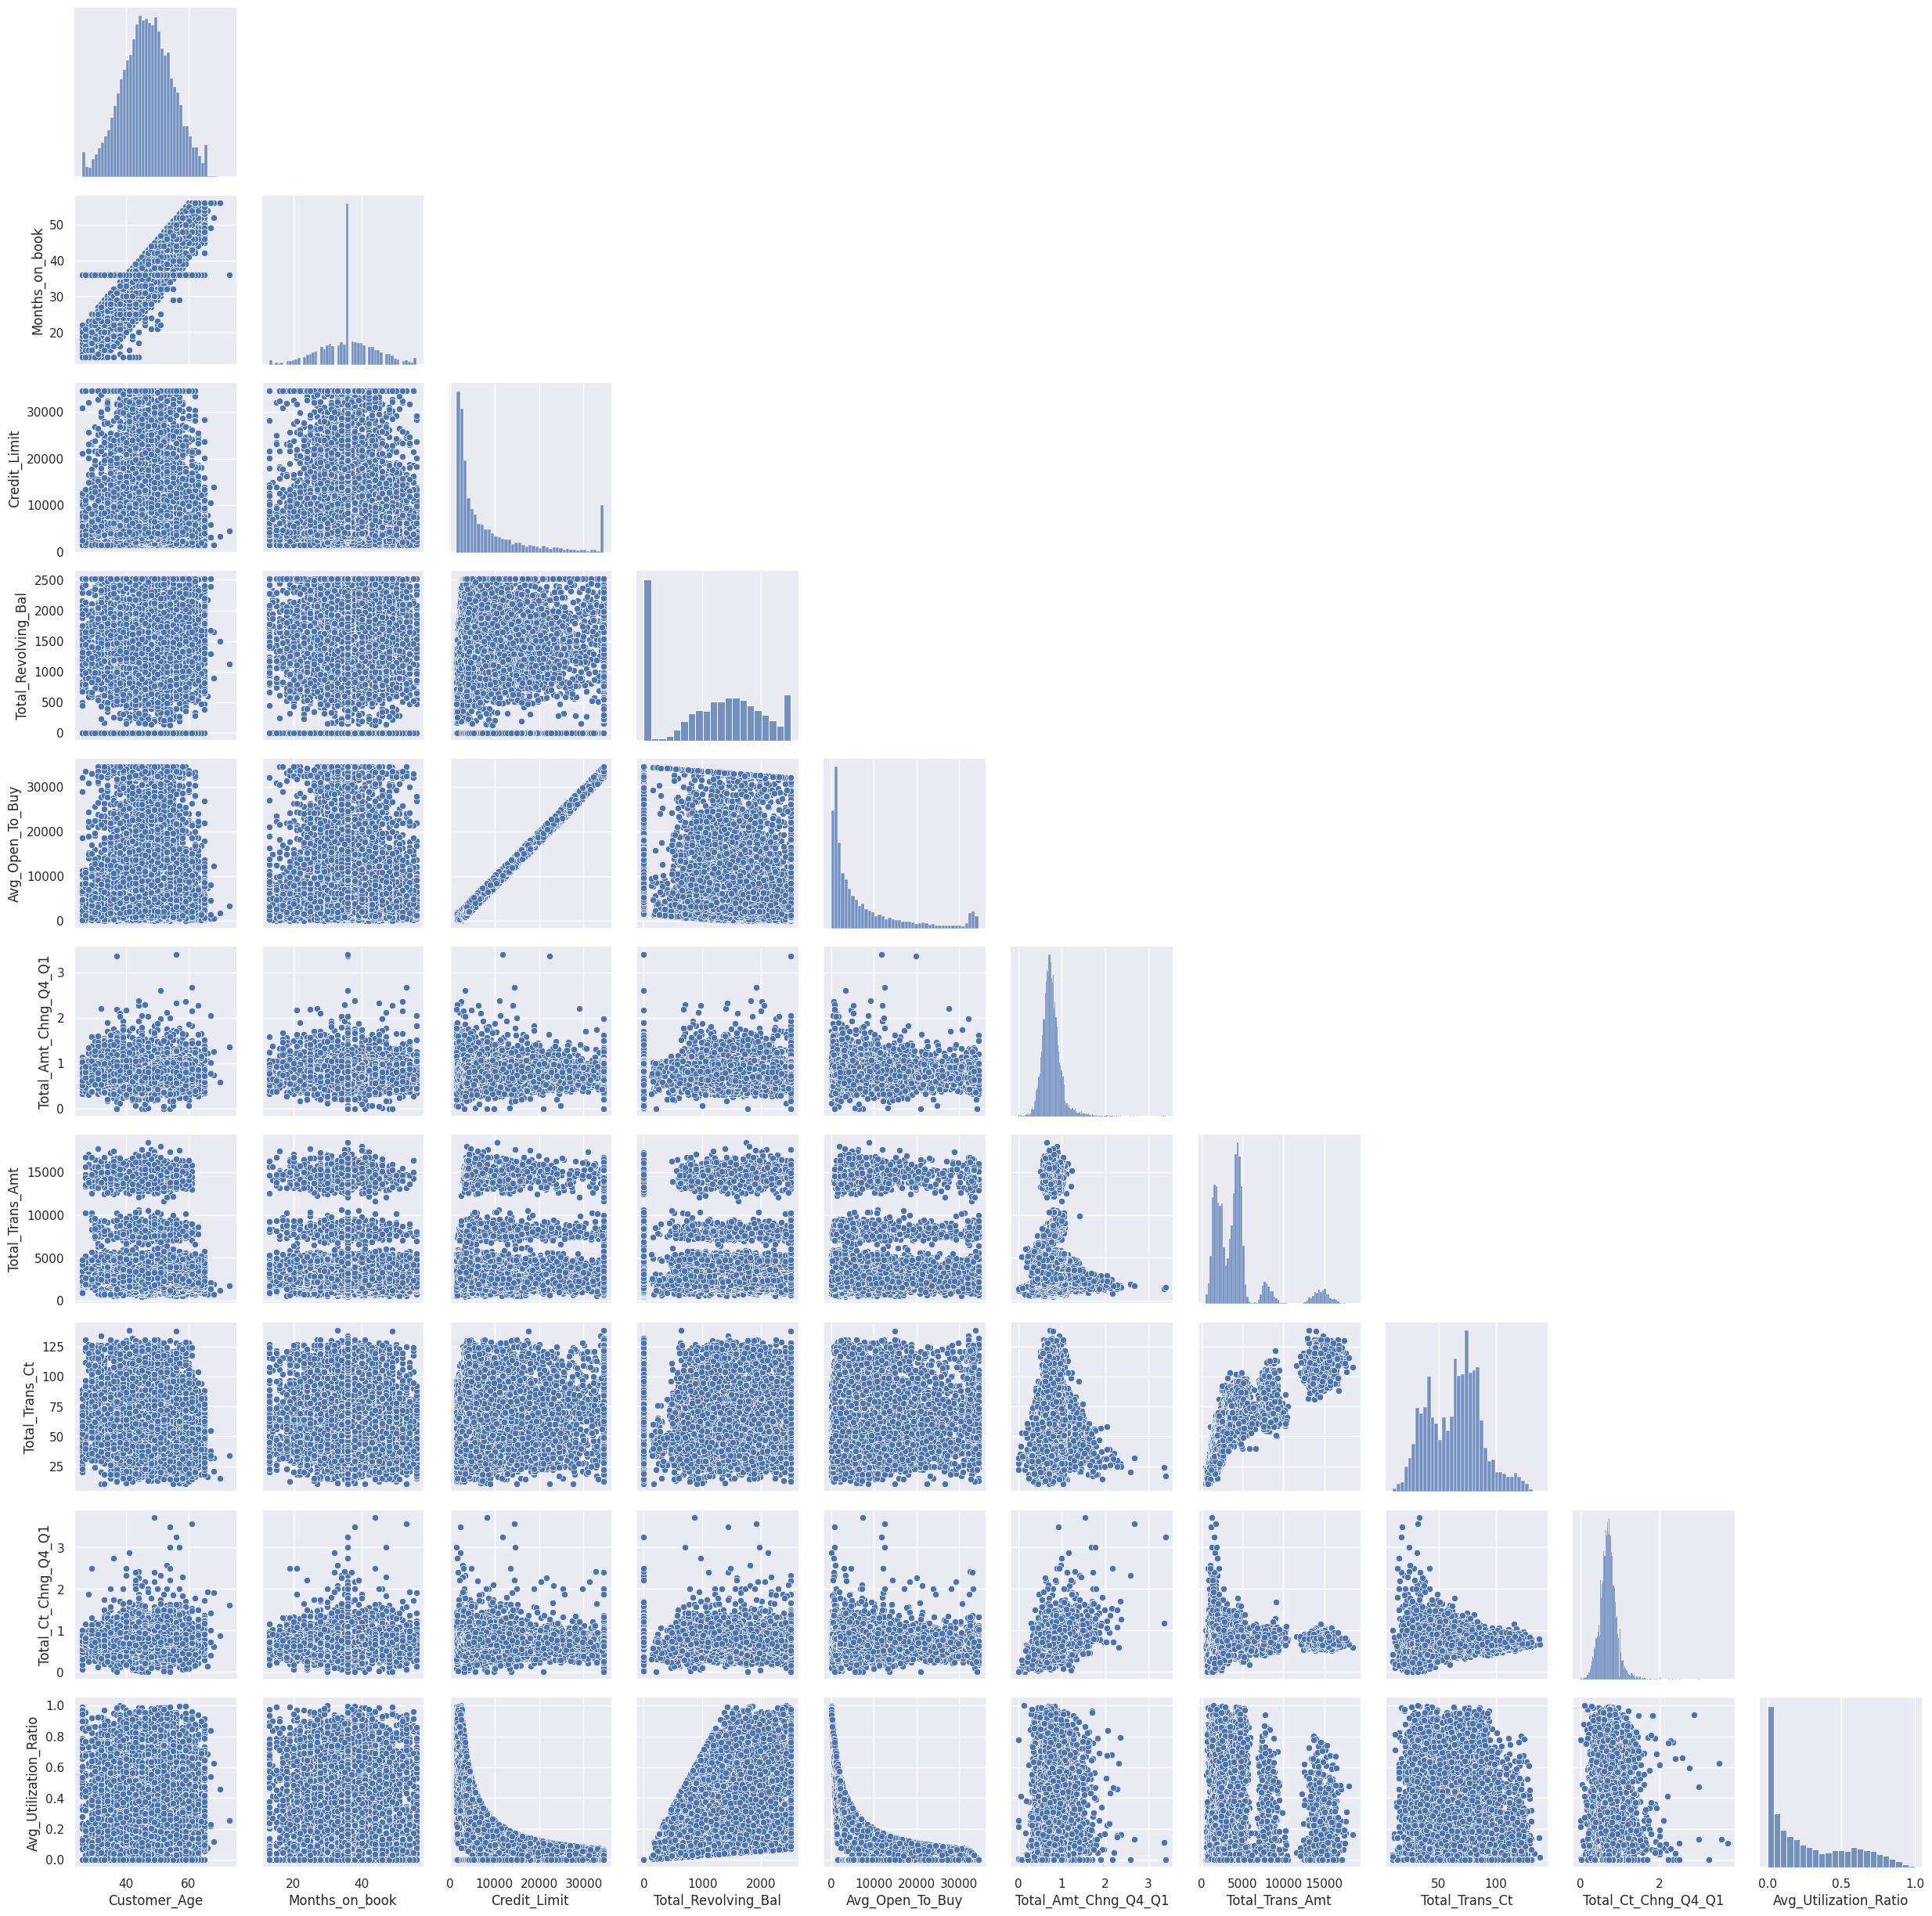

In [35]:
# Create a pairgrid
pairgrid = sns.PairGrid(numeric_data, diag_sharey = False, corner = True)
pairgrid.map_lower(sns.scatterplot)
pairgrid.map_diag(sns.histplot)

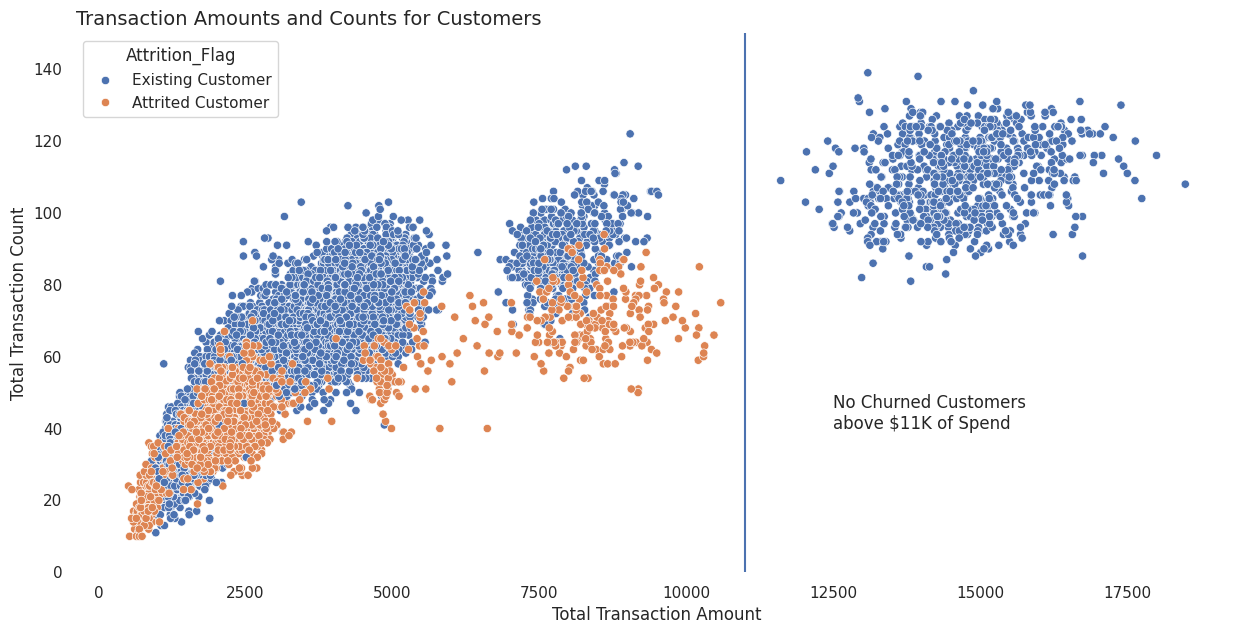

In [36]:
# Create seperate scatter plot
sns.set_theme(style="white")
palette = sns.color_palette("Set2", 12)

plt.figure(figsize=(15,7))
sns.scatterplot(x="Total_Trans_Amt", y="Total_Trans_Ct", data=df_bankchurners, hue="Attrition_Flag")

sns.despine(bottom = True, left = True) # removes the border
plt.ylim(0, 150) # changes the limits of the yaxis

plt.xlabel('Total Transaction Amount') # axis labels
plt.ylabel('Total Transaction Count') # axis labels
plt.title("Transaction Amounts and Counts for Customers", loc='left', size=14) # title

plt.vlines(11000,0,150) # adds in a vertical line at the $11k mark
plt.text(12500, 40, "No Churned Customers \nabove $11K of Spend"); # annotation

No attrited customers who have spent above 11K$.

Now, create ridge plot.

In [37]:
# Assign bins and labels
bins = [0, 11000, 900000]
labels = ["Group 1", "Group 2"]
df_bankchurners["Total_Trans_Amnt_Bin"] = pd.cut(df_bankchurners['Total_Trans_Amt'], bins=bins, labels=labels, include_lowest=True, right=False)

In [38]:
# Group dataset
df_bankchurners.groupby(['Total_Trans_Amnt_Bin','Attrition_Flag']).agg({"CLIENTNUM":"nunique",
                                         "Customer_Age":"mean",
                                         'Dependent_count': 'mean',
                                          'Months_on_book': 'mean',
                                          'Total_Relationship_Count': 'mean',
                                          'Months_Inactive_12_mon': 'mean',
                                          'Contacts_Count_12_mon': 'mean',
                                          'Credit_Limit': 'mean',
                                          'Total_Revolving_Bal': 'mean',
                                          'Avg_Open_To_Buy': 'mean',
                                          'Total_Amt_Chng_Q4_Q1': 'mean',
                                          'Total_Trans_Amt': 'mean',
                                          'Total_Trans_Ct': 'mean',
                                          'Total_Ct_Chng_Q4_Q1': 'mean',
                                          'Avg_Utilization_Ratio': 'mean'}).T

Total_Trans_Amnt_Bin               Group 1                    \
Attrition_Flag           Attrited Customer Existing Customer   
CLIENTNUM                      1627.000000       7753.000000   
Customer_Age                     46.659496         46.373920   
Dependent_count                   2.402581          2.341545   
Months_on_book                   36.178242         35.964272   
Total_Relationship_Count          3.279656          4.064620   
Months_Inactive_12_mon            2.693301          2.279376   
Contacts_Count_12_mon             2.972342          2.369018   
Credit_Limit                   8136.016595       8213.614988   
Total_Revolving_Bal             672.822987       1245.908165   
Avg_Open_To_Buy                7463.193608       6967.706823   
Total_Amt_Chng_Q4_Q1              0.694277          0.772248   
Total_Trans_Amt                3095.025814       3686.943506   
Total_Trans_Ct                   44.933620         64.658326   
Total_Ct_Chng_Q4_Q1               0.554386          0.741687   
Avg_Utilization_Ratio             0.162475          0.307600   

Total_Trans_Amnt_Bin               Group 2                    
Attrition_Flag           Attrited Customer Existing Customer  
CLIENTNUM                              0.0        747.000000  
Customer_Age                           NaN         45.101740  
Dependent_count                        NaN          2.271754  
Months_on_book                         NaN         35.012048  
Total_Relationship_Count               NaN          2.357430  
Months_Inactive_12_mon                 NaN          2.215529  
Contacts_Count_12_mon                  NaN          2.224900  
Credit_Limit                           NaN      14053.797858  
Total_Revolving_Bal                    NaN       1367.615797  
Avg_Open_To_Buy                        NaN      12686.182062  
Total_Amt_Chng_Q4_Q1                   NaN          0.775229  
Total_Trans_Amt                        NaN      14698.396252  
Total_Trans_Ct                         NaN        110.336011  
Total_Ct_Chng_Q4_Q1                    NaN          0.750190  
Avg_Utilization_Ratio                  NaN          0.180288

Earlier, we had highlighted the following variables that showed differences between Churned and Existing customers:

1) Total_Revolving_Bal (still a good indicator)

2) Avg_Utilization_Ratio (not good anymore, since attrited and existing have similar values)

3) Total_Trans_Ct (still a good indicator)

4) Total_Trans_Amt (not good anymore, since attrited and existing have similar values)


But also notice how the Q4-Q1 change is significantly different for Churned customers too! This indicates that churned customers are spending significantly less (-25% lower than their counterparts) after the holiday season, pulling back much more sigificantly. This is something we can probably build a recommendation off of. If we can impact this variable, we can also directly impact the Total_Trans_Ct!

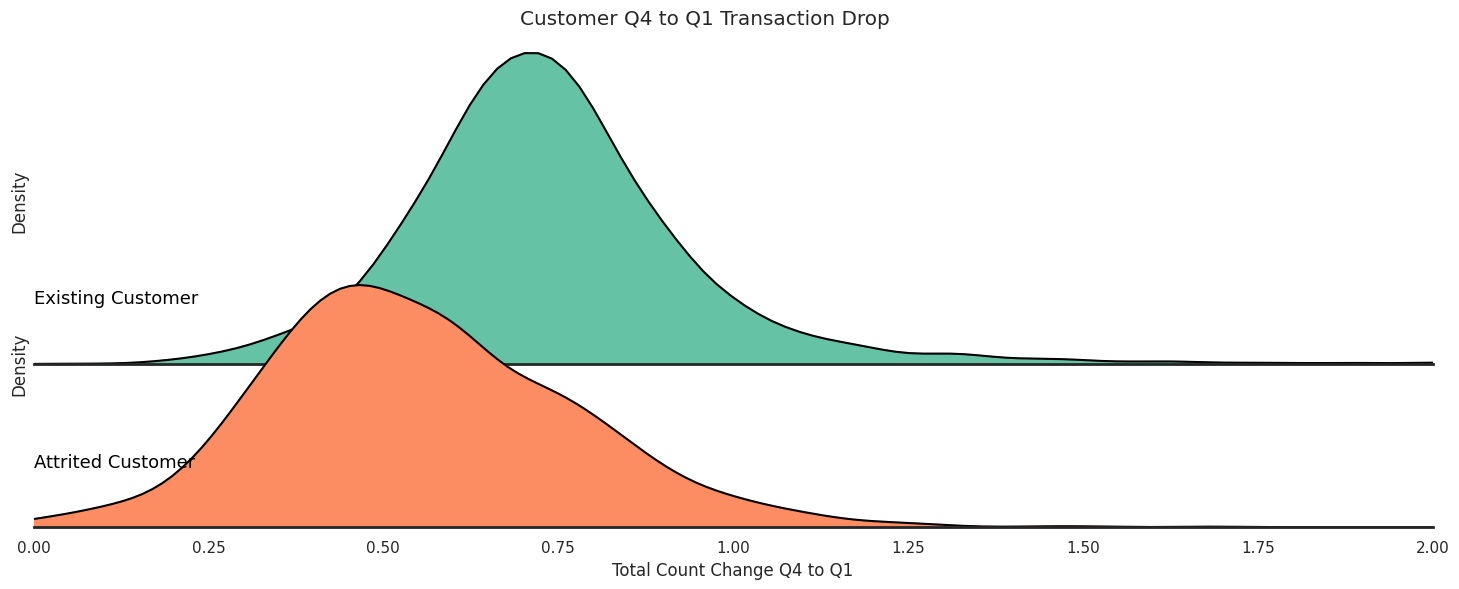

In [39]:
# Create kde plot
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
palette = sns.color_palette("Set2", 12)
g = sns.FacetGrid(df_bankchurners, palette=palette, row="Attrition_Flag", hue="Attrition_Flag", aspect=5, height=3)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="Total_Ct_Chng_Q4_Q1", color='black')
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, color='black', fontsize=13,
            ha="left", va="center", transform=ax.transAxes)

g.map(label, "Attrition_Flag")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Total Count Change Q4 to Q1")
g.despine(left=True)
plt.suptitle('Customer Q4 to Q1 Transaction Drop', y=0.98)

plt.xlim(0,2);

We have some insights into customers who are churned and who are existing.

Now, let's get more insights about customer demographics.

### Customer Demographics

In [40]:
# Create function for easy ploting
def plot_demographics(column_name):
  # Plotting count of customers by life stage, gender, and attrition type
  plt.figure(figsize=(8, 5))
  ax = sns.countplot(x=column_name, data=df_bankchurners, hue='Attrition_Flag', palette='viridis', hue_order=['Existing Customer', 'Attrited Customer'])

  # Customize the plot
  plt.title(f'Number of Customers by {column_name} and Attrition Type')
  plt.ylabel('Number of Customers')
  plt.xlabel('Gender')

  # Customize legend
  legend = plt.legend(title='Attrition Type', loc='upper right', prop={"size": 6})
  legend.get_frame().set_facecolor('white')  # Set legend background color to white

  # Optionally, rotate x-axis labels for better visibility
  plt.xticks(rotation=45, ha='right')
  plt.show()

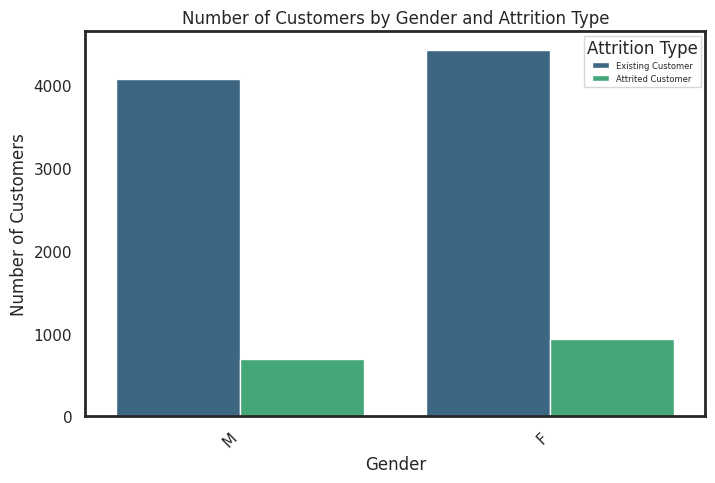

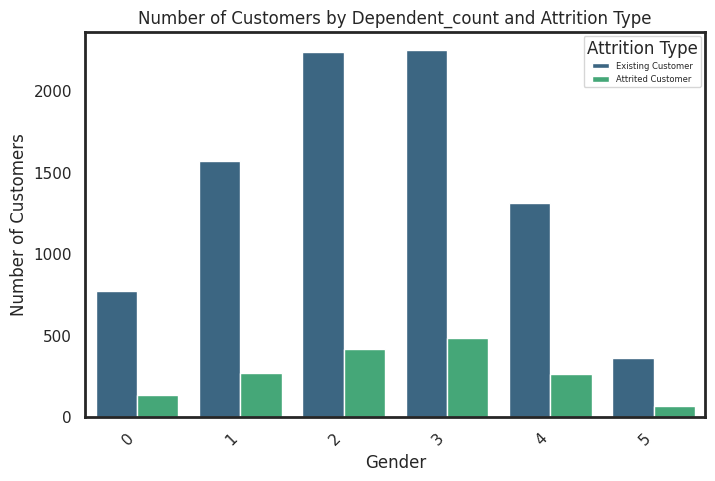

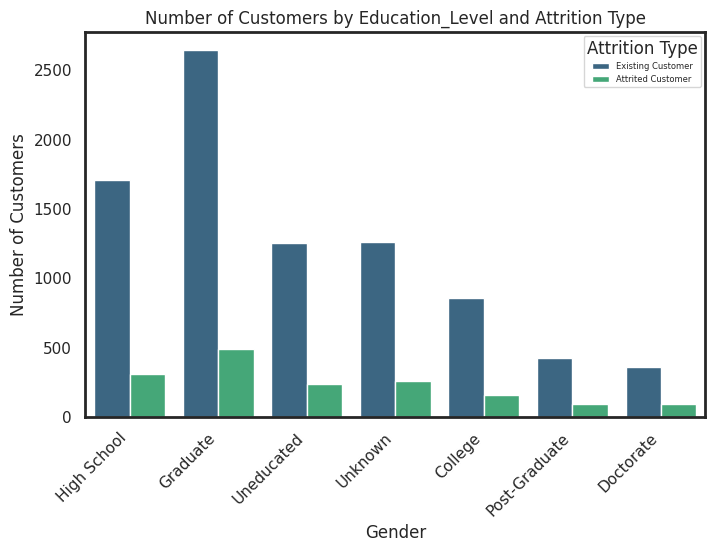

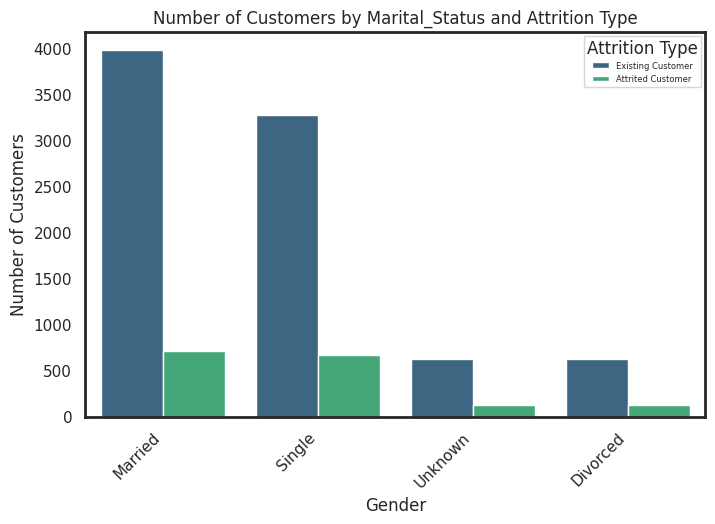

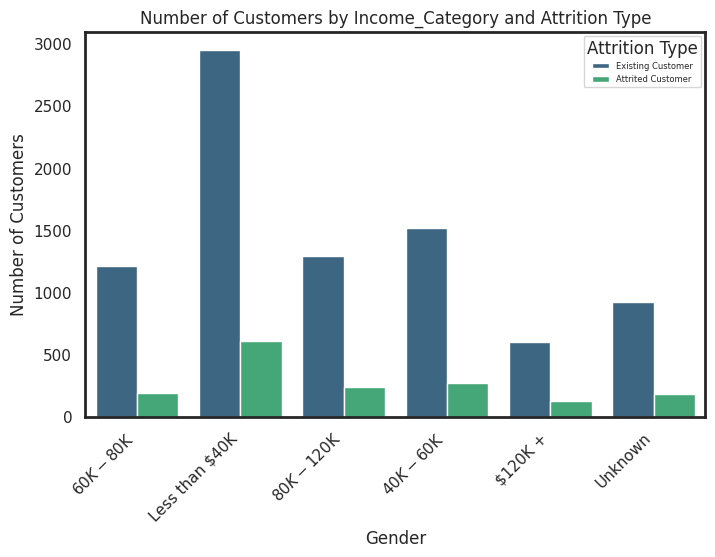

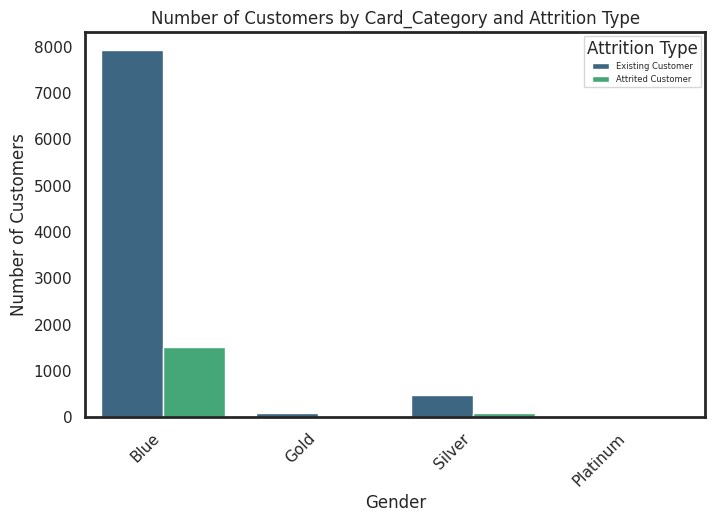

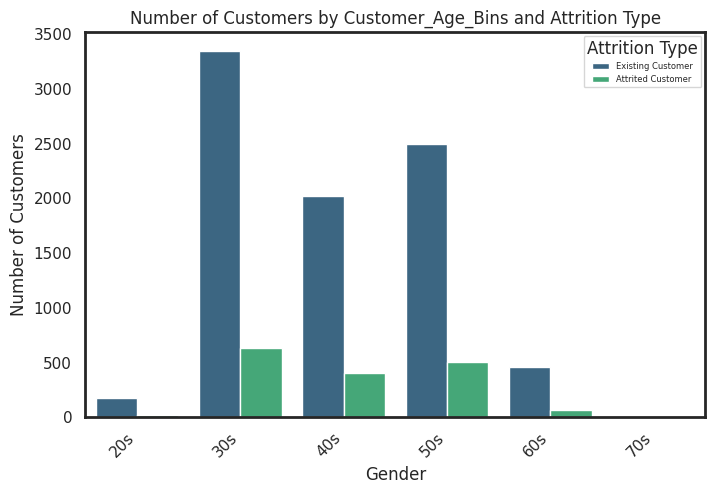

In [41]:
# Create a list of customer demographics
demographics = ['Gender','Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Customer_Age_Bins']
for demo in demographics:
  plot_demographics(demo)

In [42]:
df_bankchurners.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Customer_Age_Bins', 'Total_Trans_Amnt_Bin'],
      dtype='object')

In [43]:
# Create function to plot numerical attributes with customer demographics
def plot_cust(column_name, numeric_attribute):
  # Plotting sum of total sales by life stage and customer type
  plt.figure(figsize=(8, 5))
  sns.barplot(x=column_name, y=numeric_attribute, data=df_bankchurners, estimator='sum', errorbar=None, hue='Attrition_Flag',palette='viridis')

  # Customize the plot
  plt.title(f'Sum of Total {numeric_attribute} by {column_name} and Attrition Type')
  plt.ylabel(f'Total {numeric_attribute}')
  plt.xlabel(f'{column_name}')

  # Customize legend
  legend = plt.legend(title='Attrition Type', loc='upper right', prop={"size": 6})
  legend.get_frame().set_facecolor('white')  # Set legend background color to white

  # Optionally, rotate x-axis labels for better visibility
  plt.xticks(rotation=45, ha='right')
  plt.show()

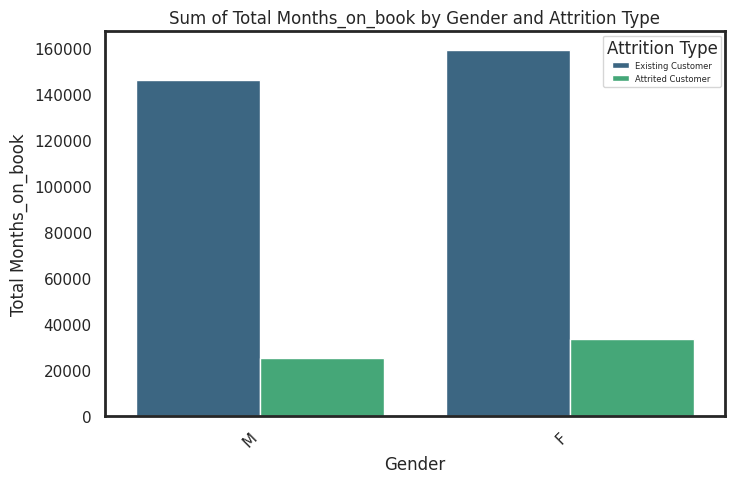

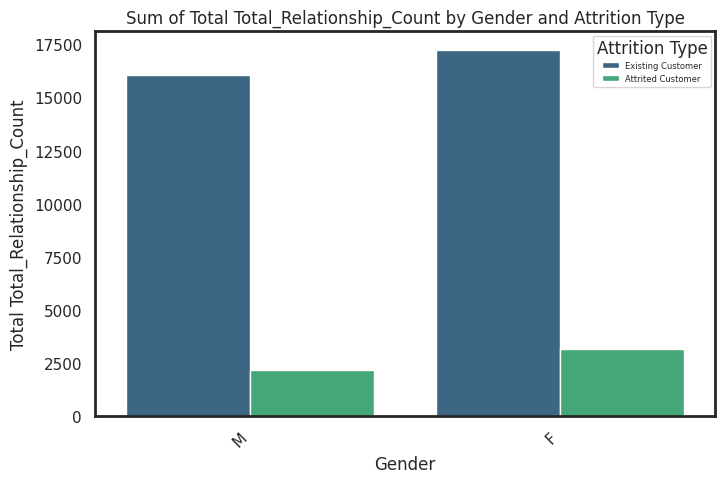

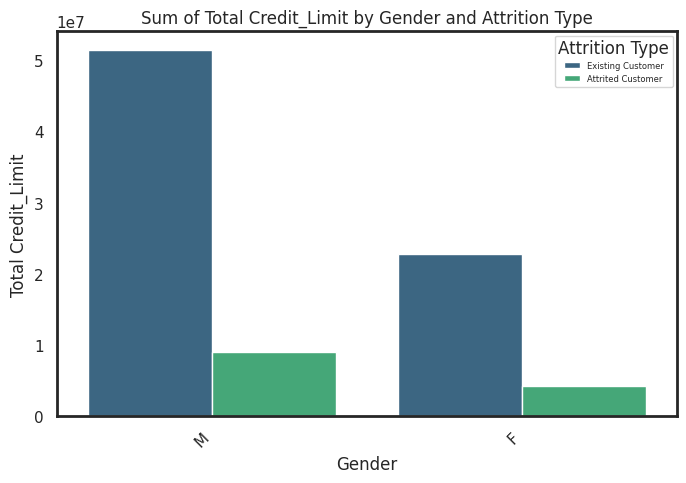

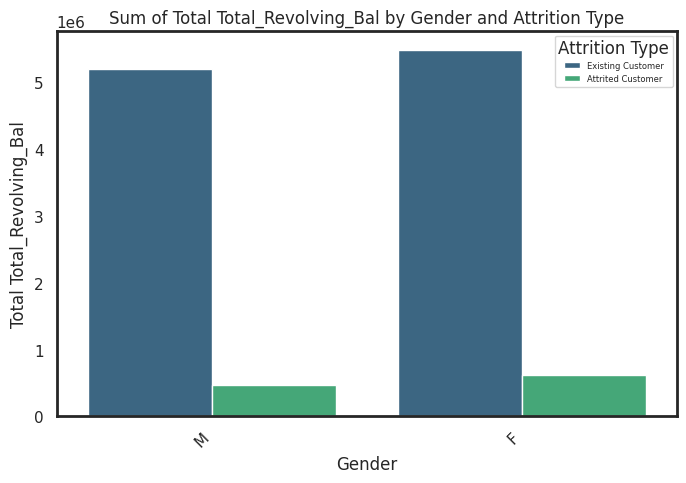

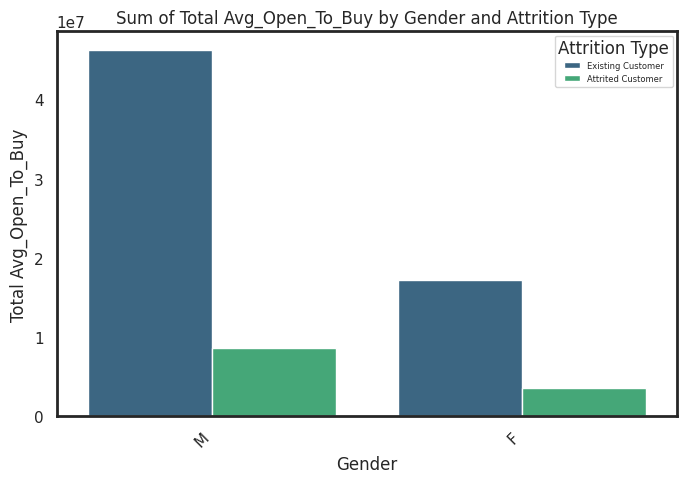

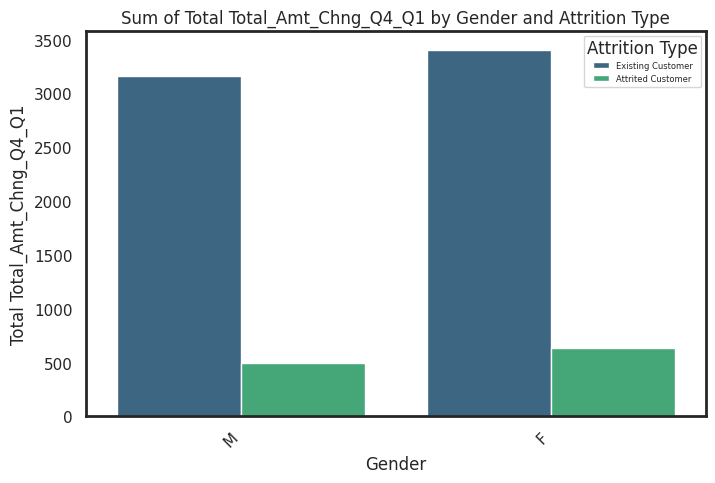

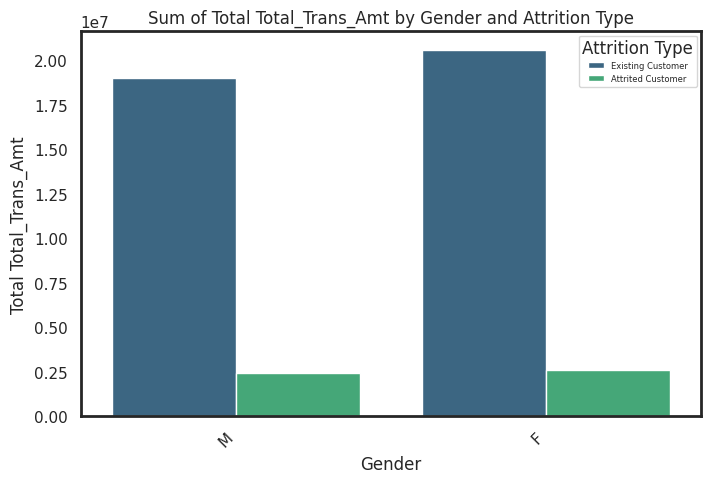

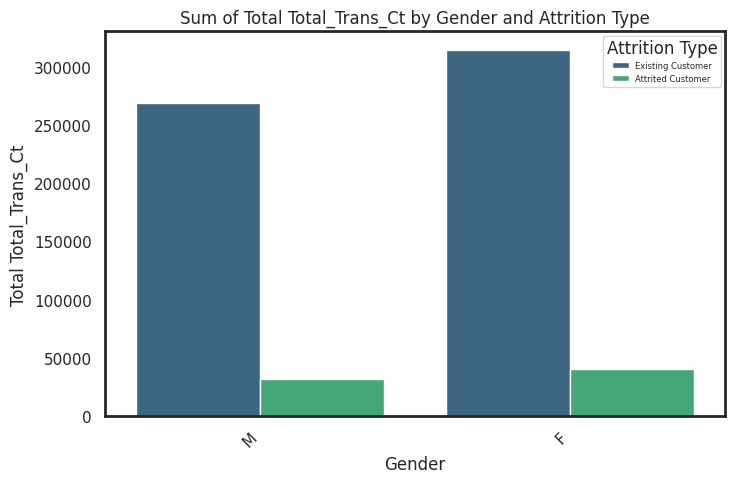

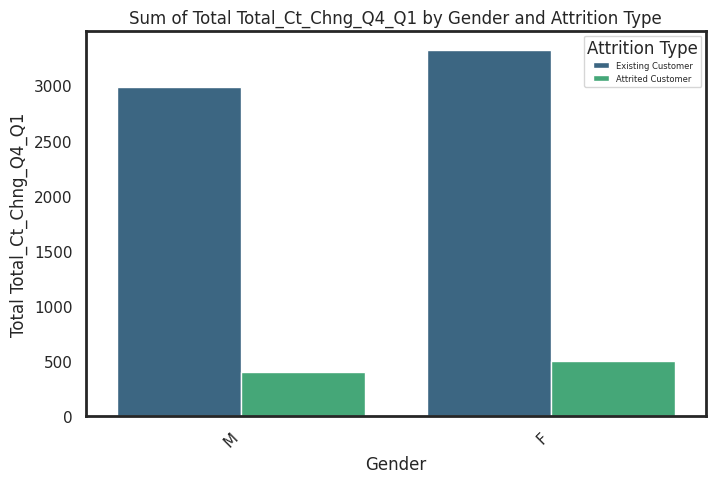

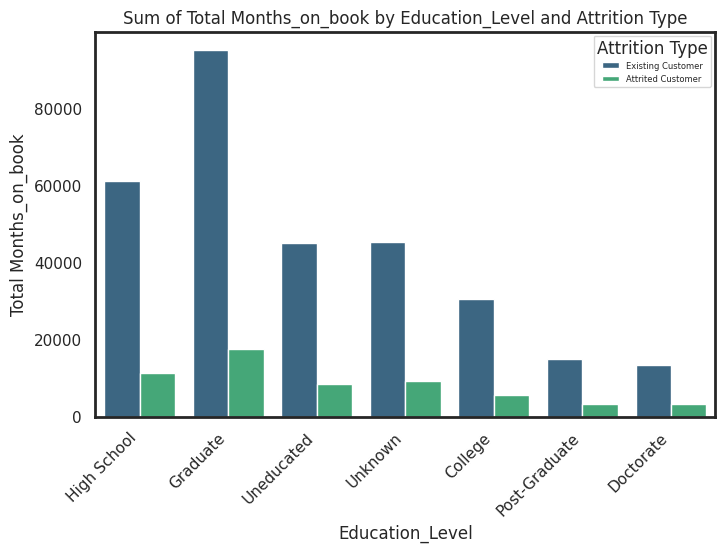

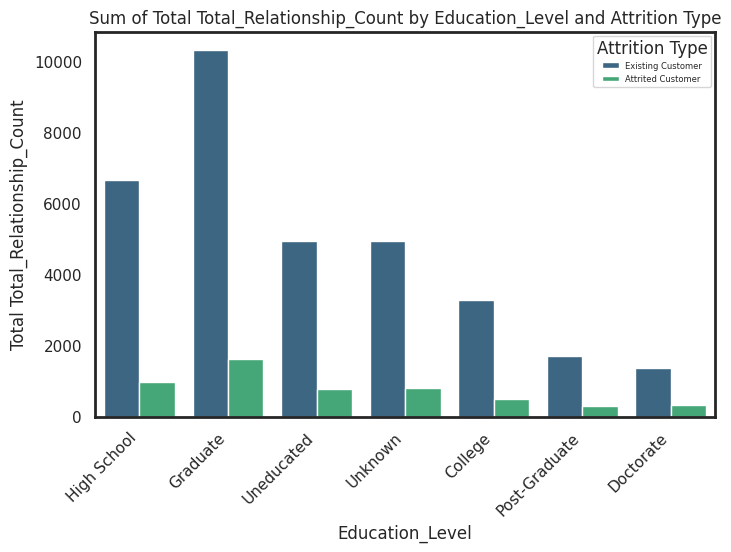

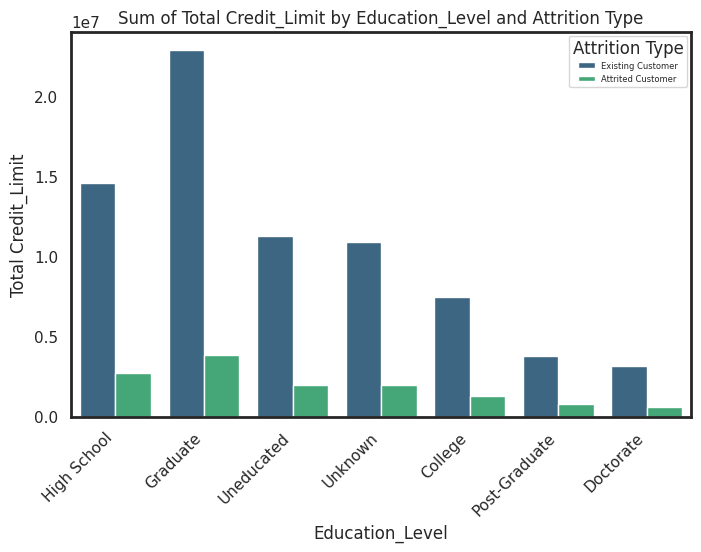

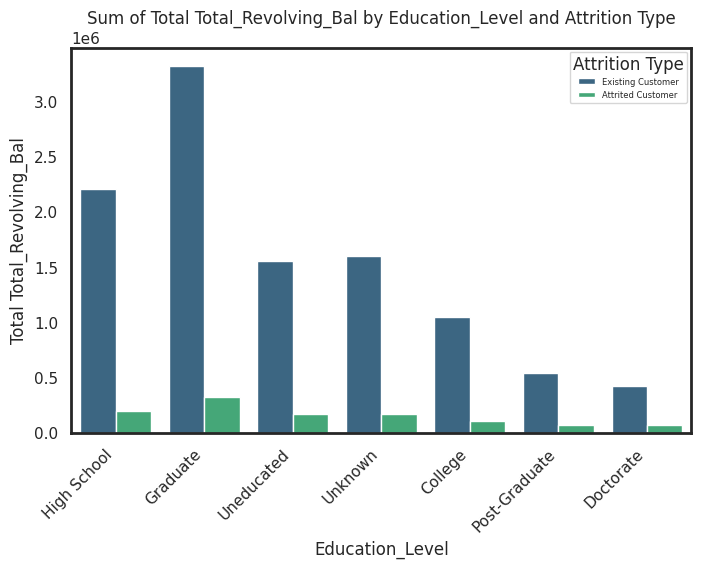

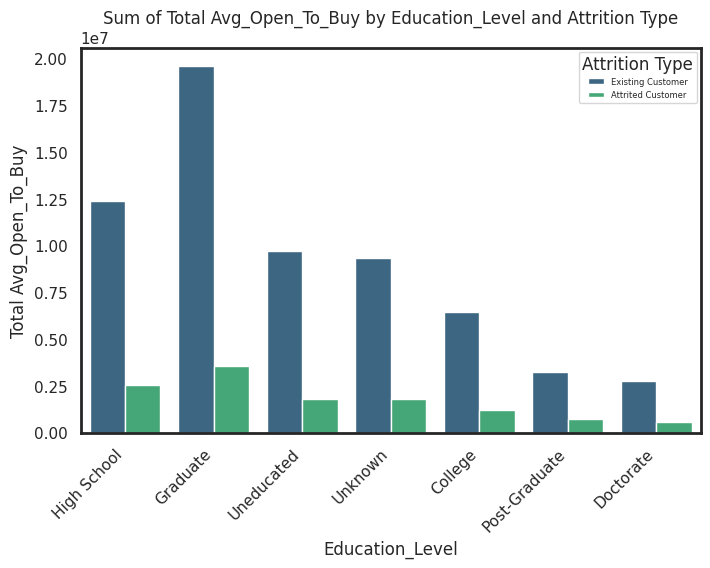

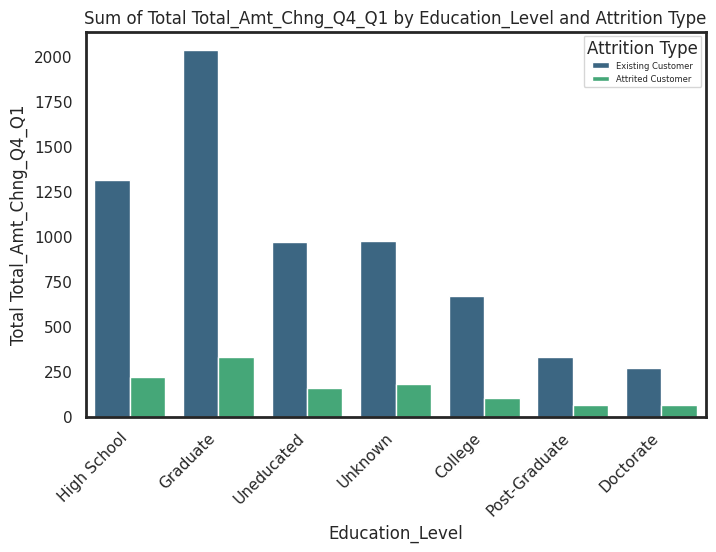

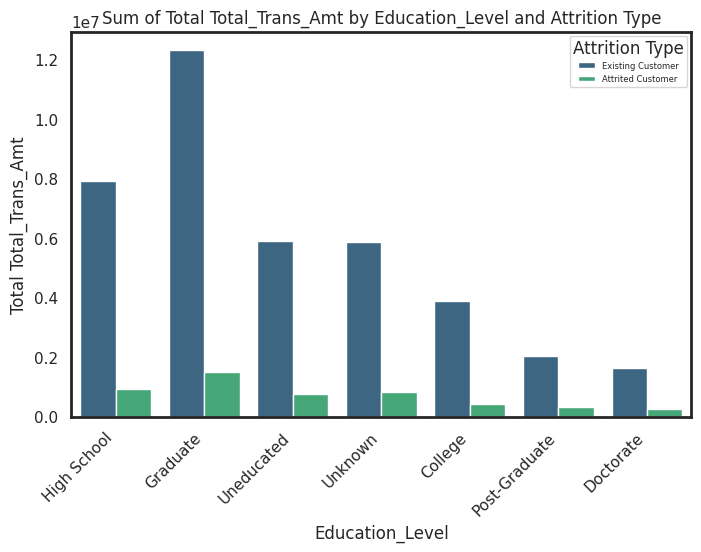

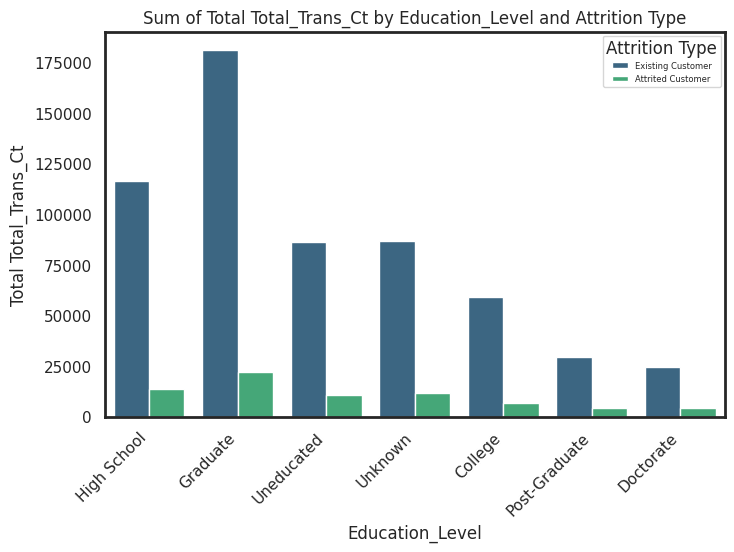

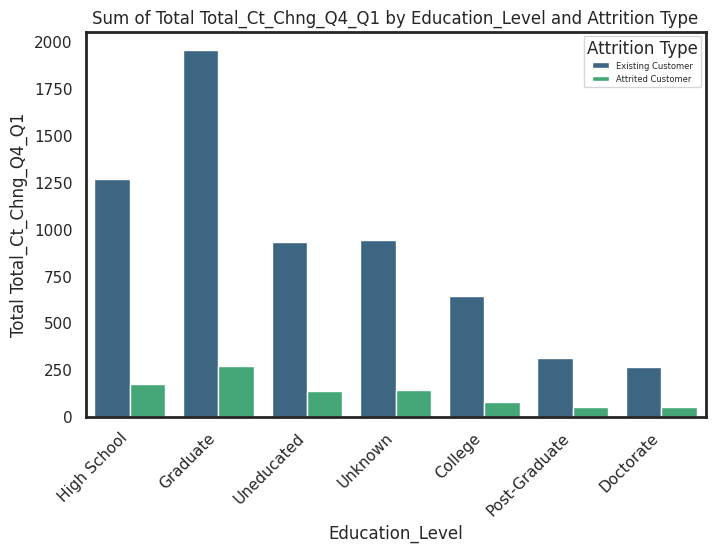

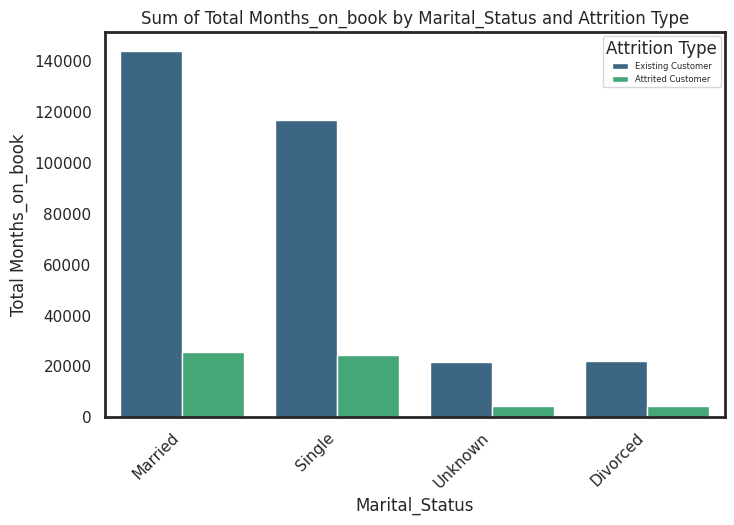

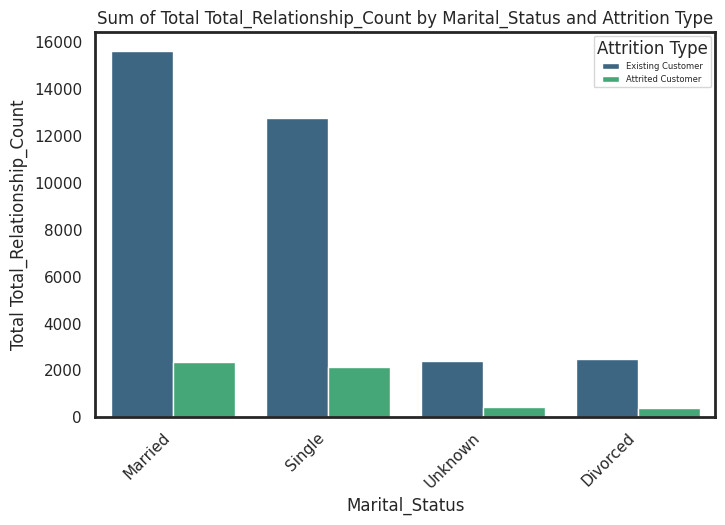

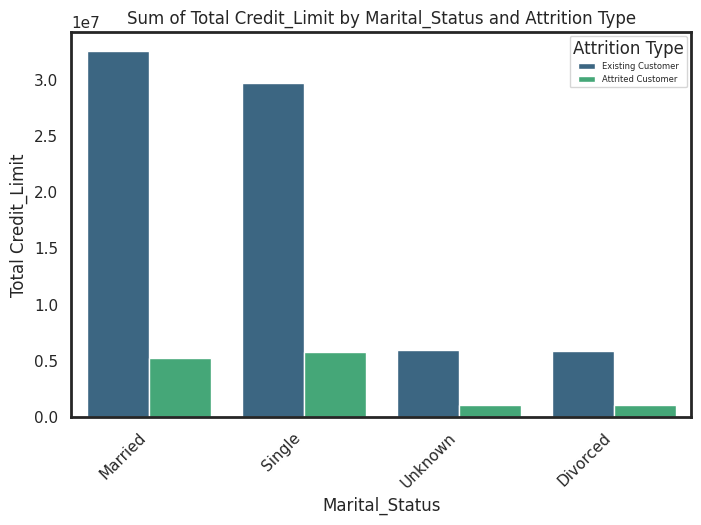

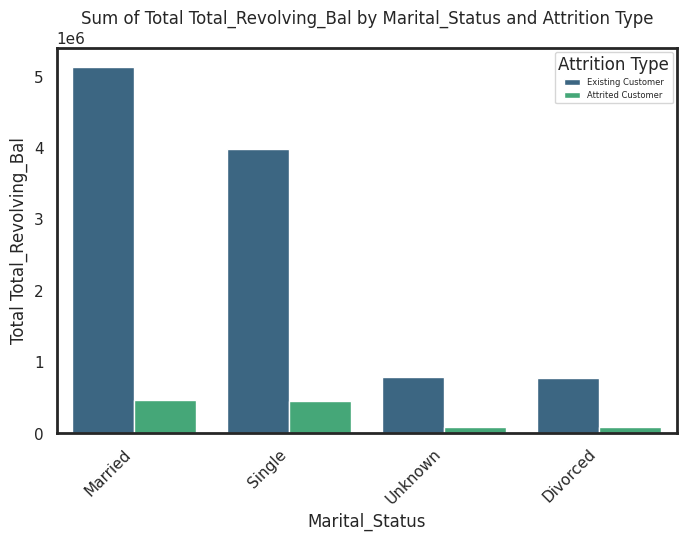

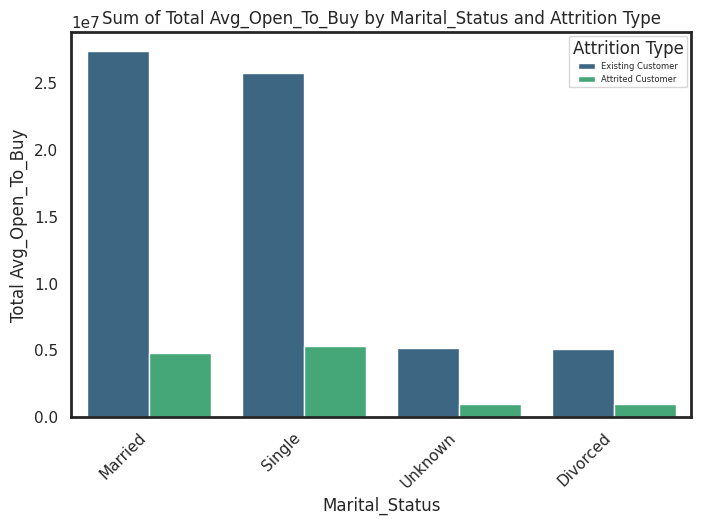

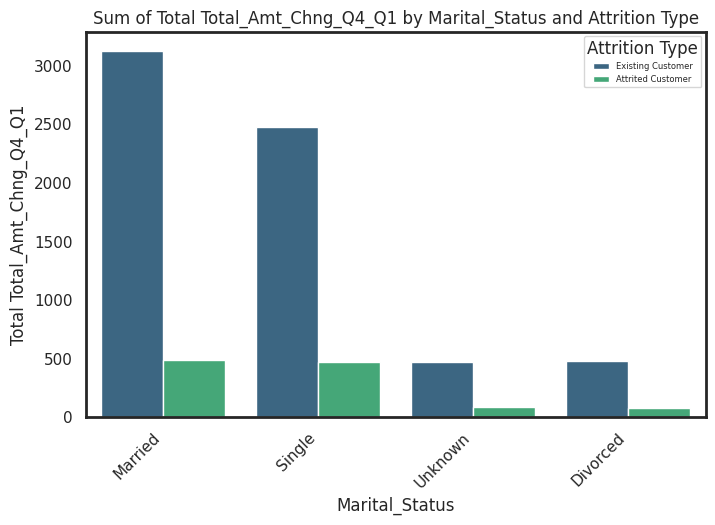

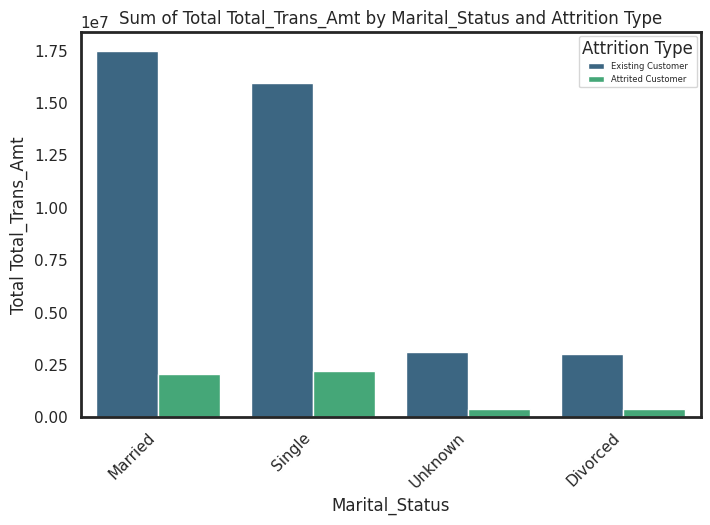

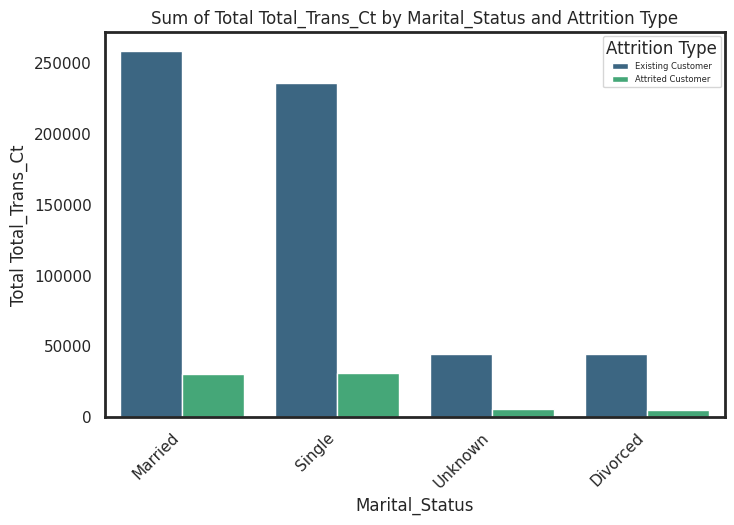

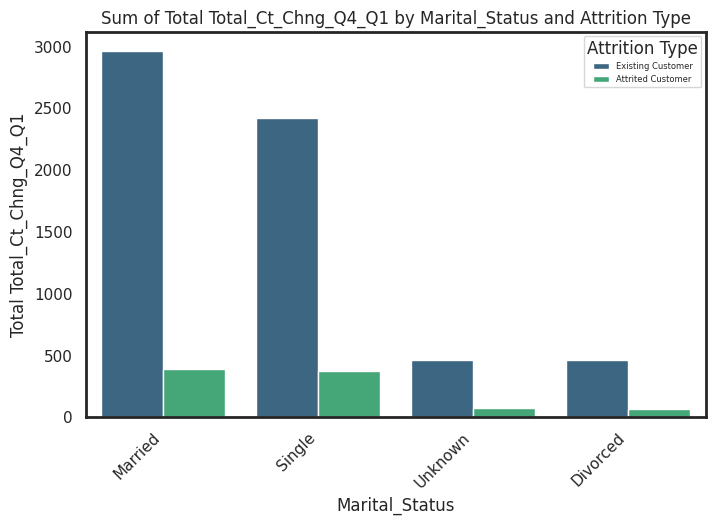

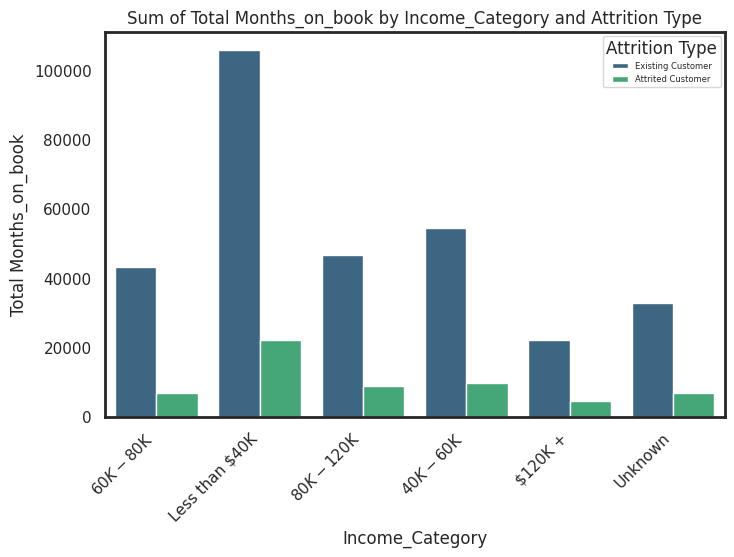

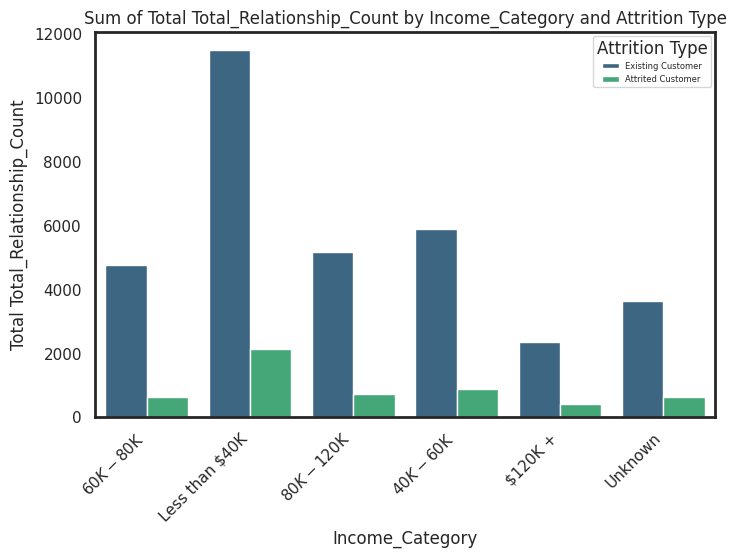

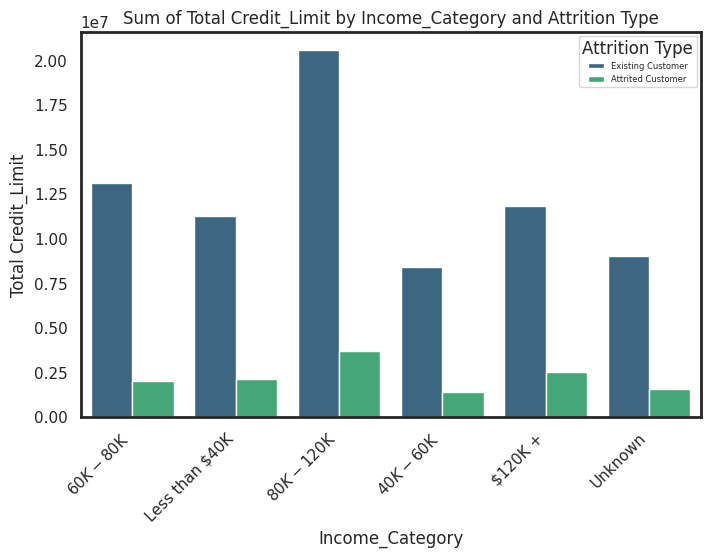

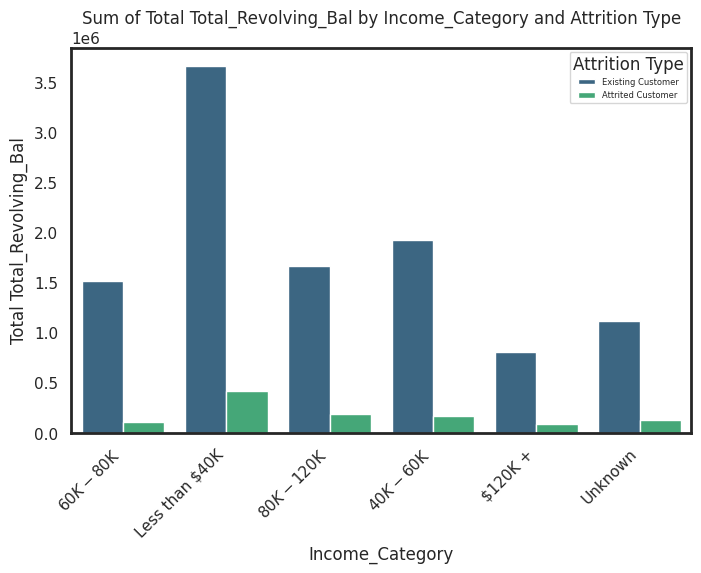

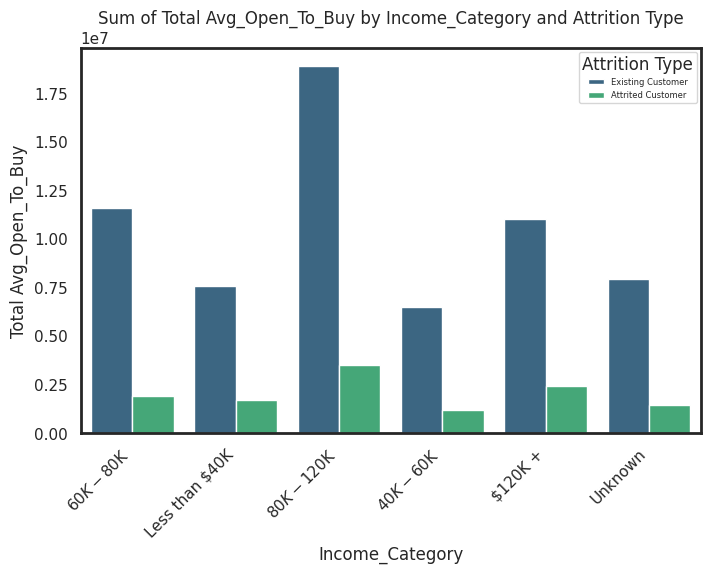

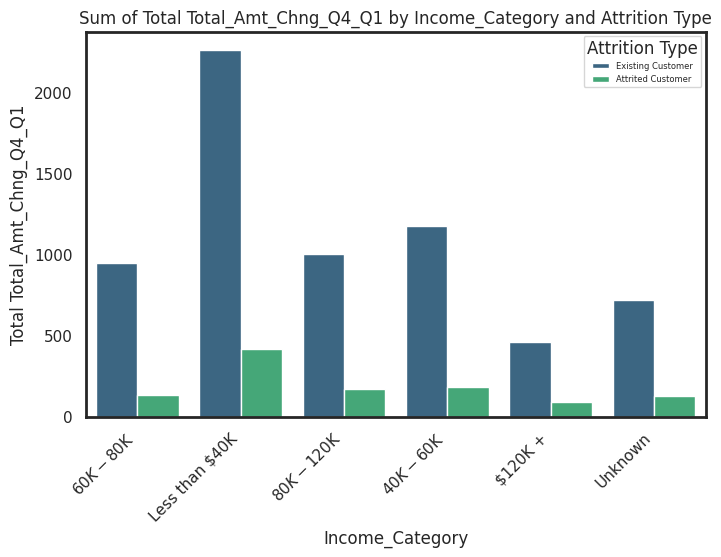

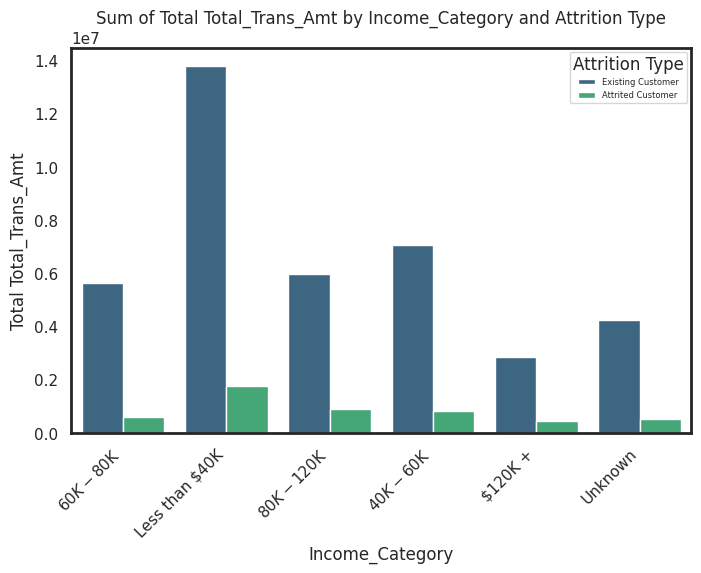

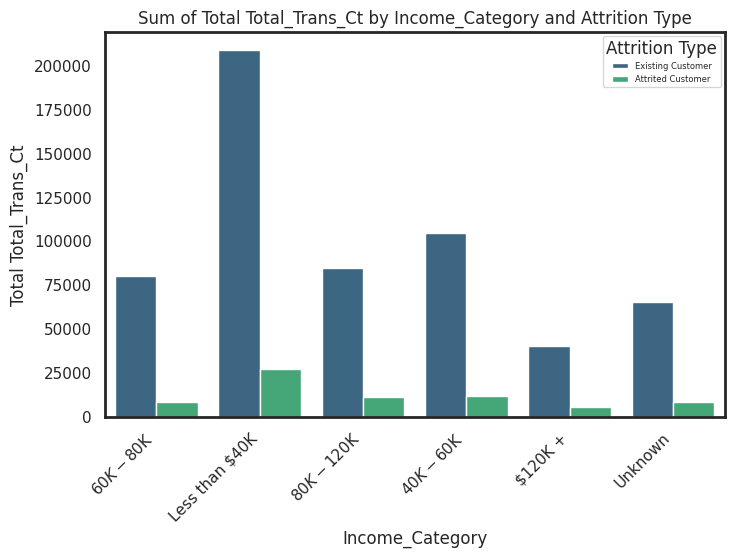

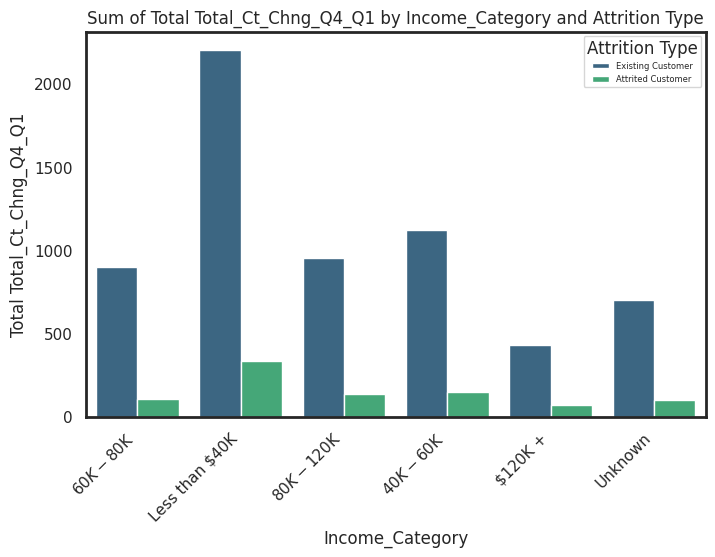

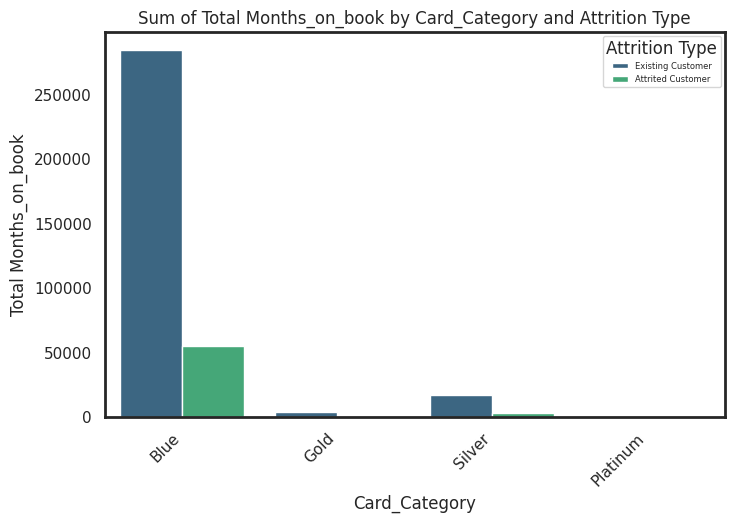

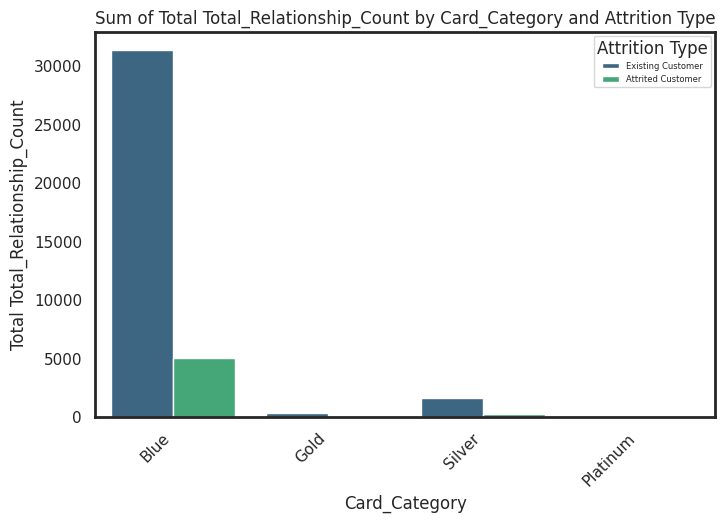

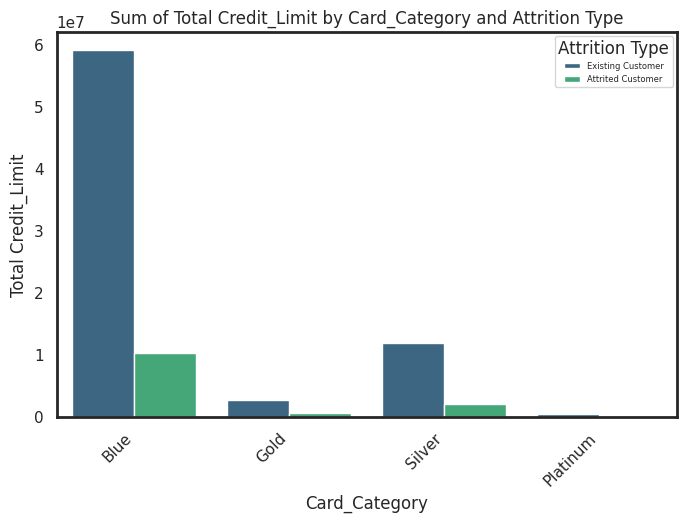

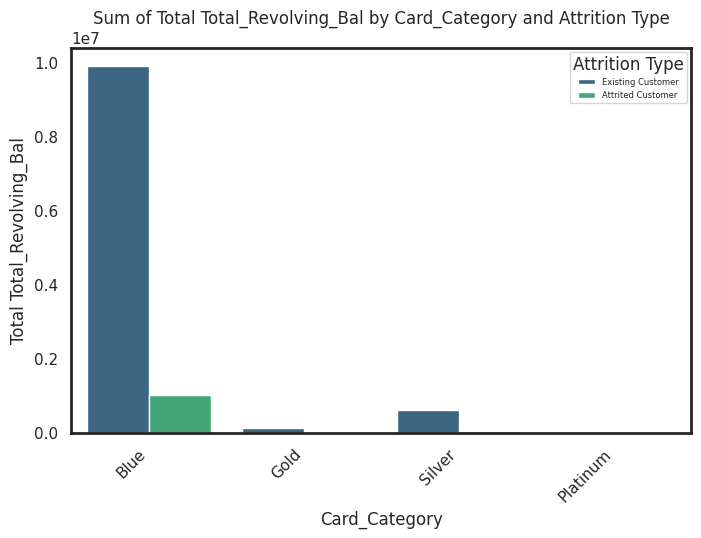

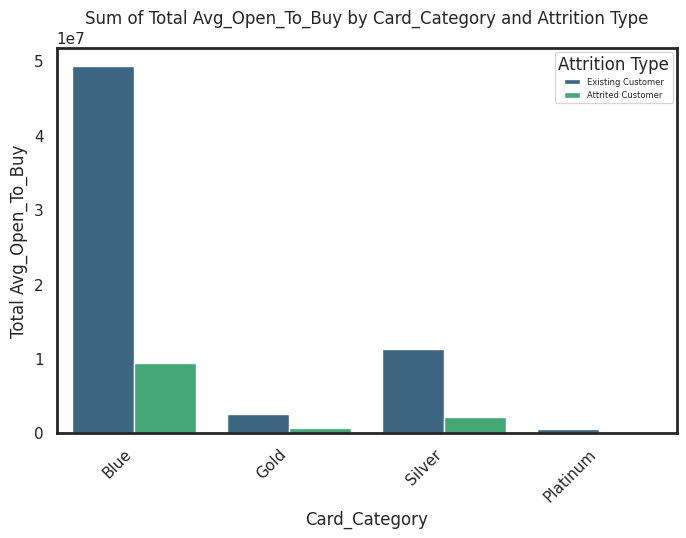

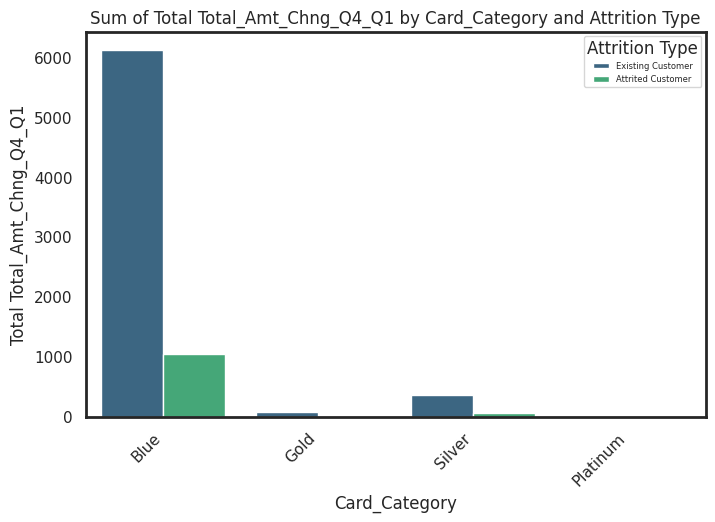

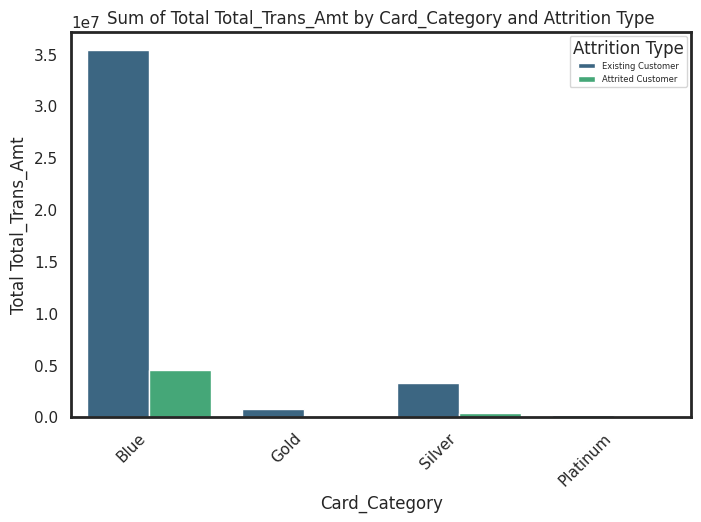

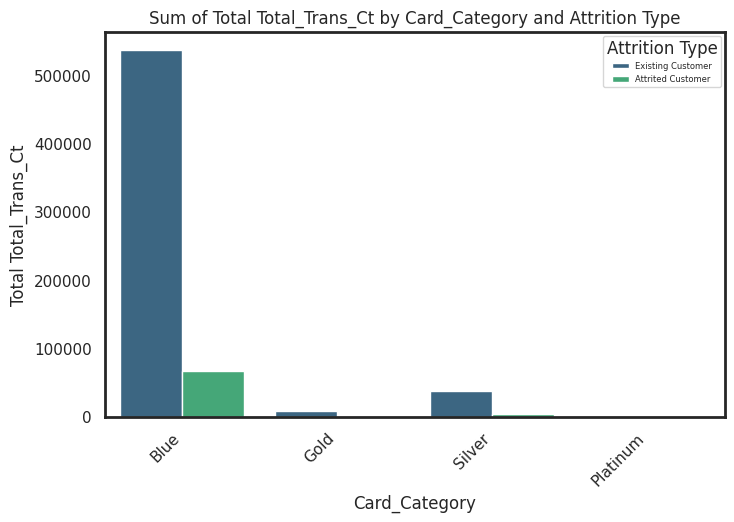

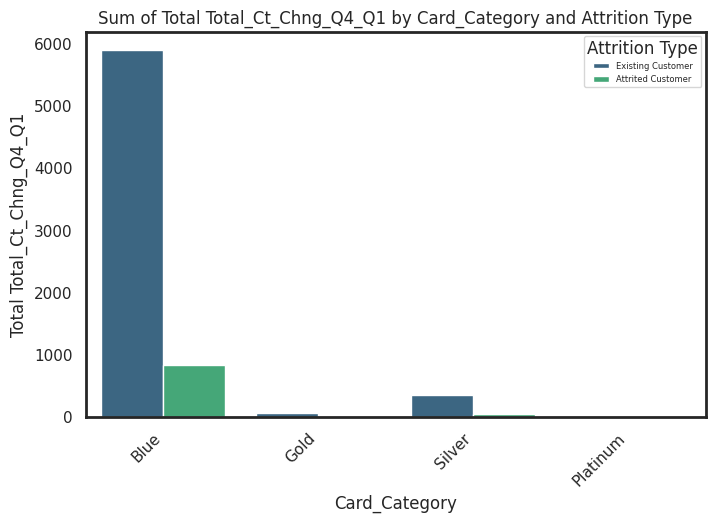

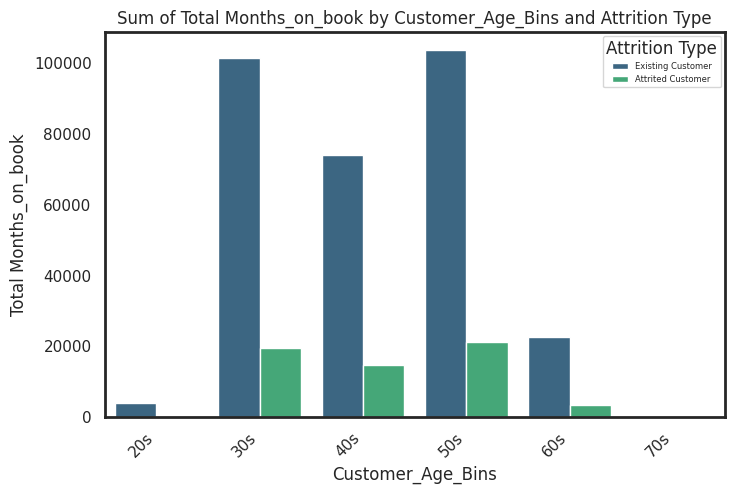

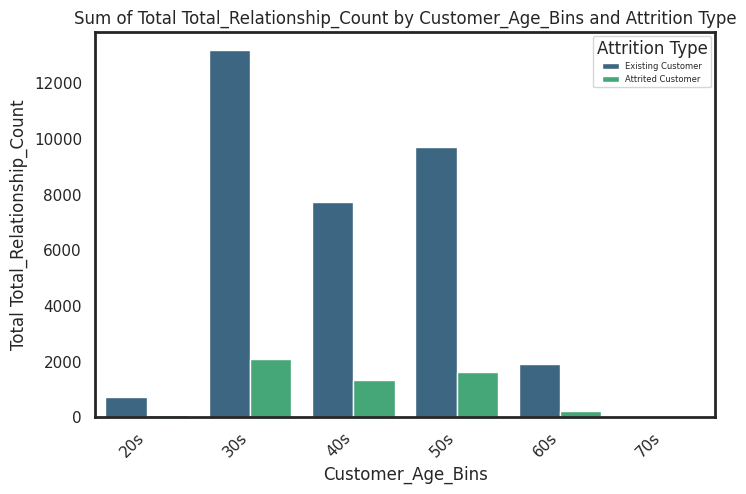

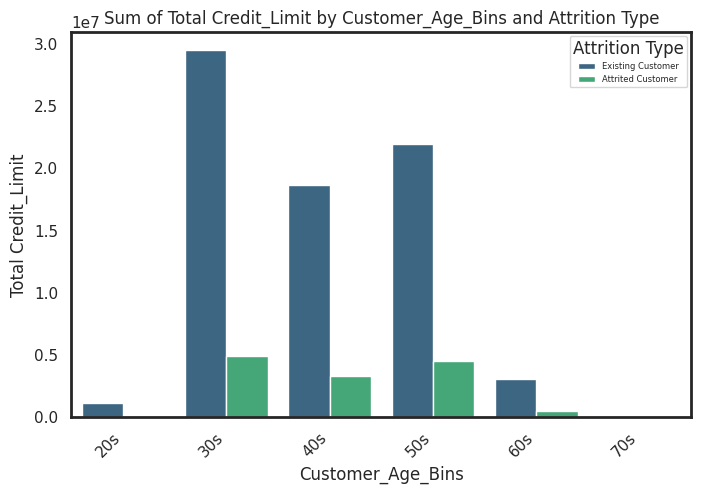

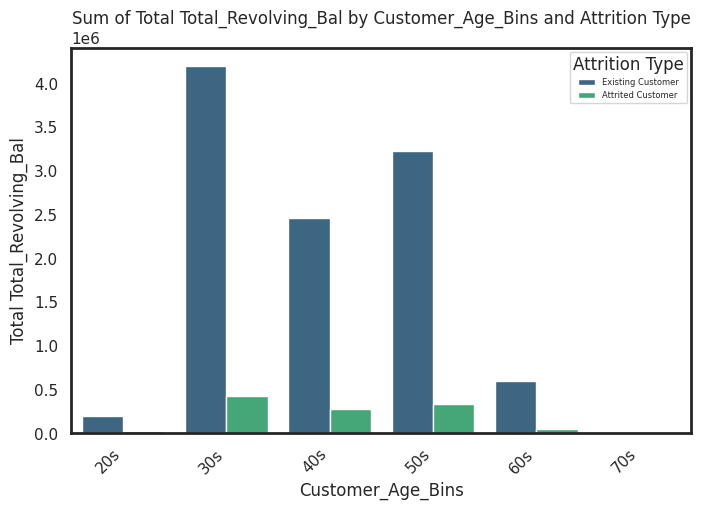

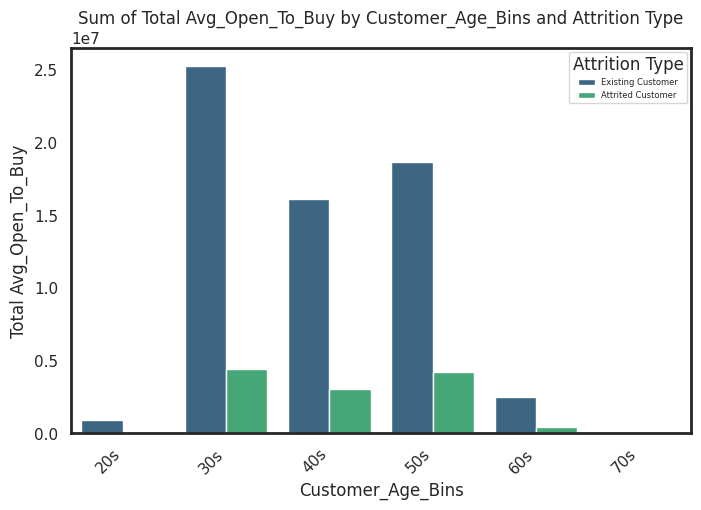

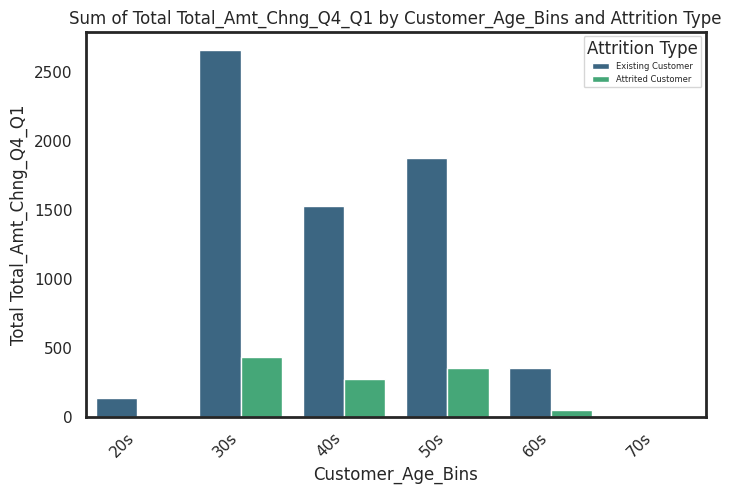

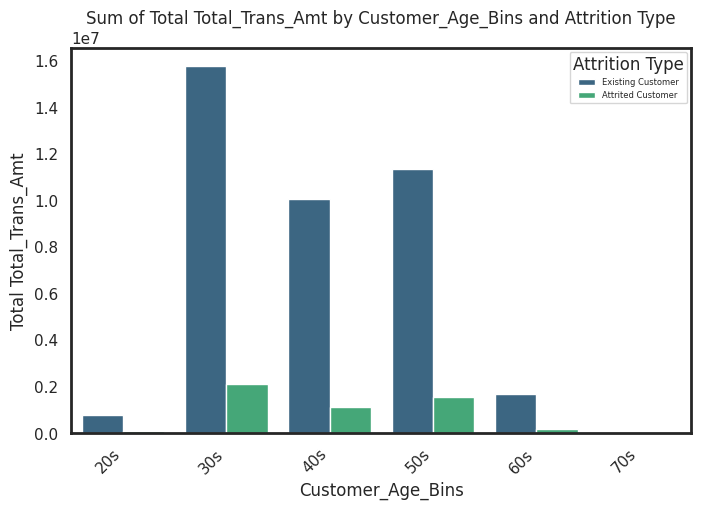

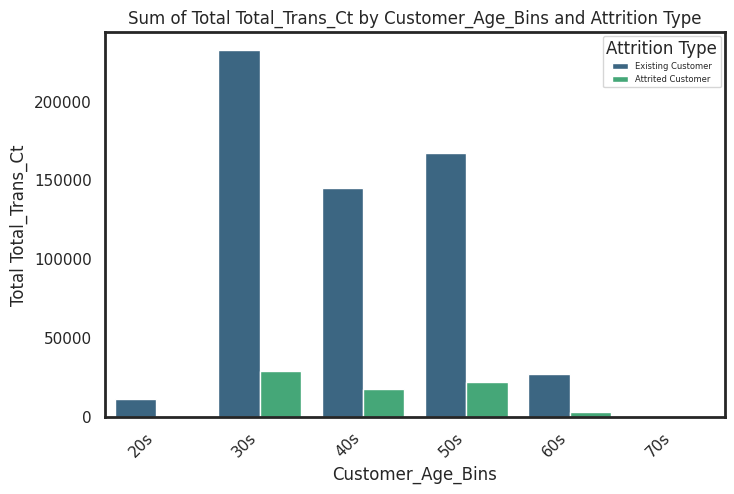

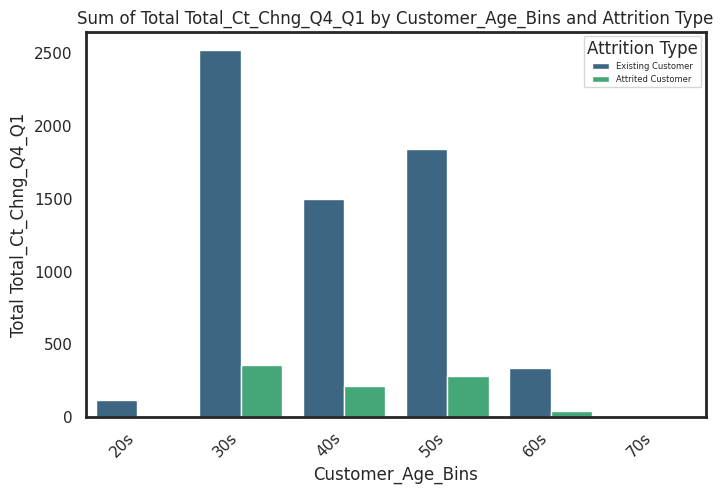

In [44]:
# Create a list of customer demographics
demographics = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Customer_Age_Bins']
numeric_vars = ['Months_on_book', 'Total_Relationship_Count', 'Credit_Limit', 'Total_Revolving_Bal',
                'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']

# Loop through combinations of demographics and numeric variables
for demo in demographics:
    for num_var in numeric_vars:
        plot_cust(demo, num_var)

### Outlier Analysis

In [45]:
# Look at descriptive statistics again
# Get description of numerical attributes
print(f'Dataset description:\nNumerical Data\n{df_bankchurners.describe().transpose()}\n')

# Get description of categorical attributes
print(f'Dataset description:\nCategorical Data\n{df_bankchurners.describe(include = object).transpose()}')

Dataset description:
Numerical Data
                            count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631939e+03  9.088789e+03       1438.0   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469125e+03  9.090696e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10

In [46]:
# Define the variables for the box plots
boxplot_variables = ['Customer_Age', 'Credit_Limit', 'Total_Relationship_Count', 'Total_Revolving_Bal', 'Total_Trans_Ct', 'Total_Trans_Amt',
                     'Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1','Avg_Open_To_Buy','Contacts_Count_12_mon','Months_Inactive_12_mon',
                     'Months_on_book']

for variable in boxplot_variables:
  fig = px.box(df_bankchurners, x=variable)
  fig.show()

In the above box plots, we can see that in some columns we have outliers that can effect the algorithm significantly. Let's modify outliers but it is important to know that also removing data leads to a lose of information so in some cases this is not allowed.



In [47]:
# Create list
list1 = ['Customer_Age','Total_Trans_Ct']
for item in list1:
  q1 = df_bankchurners[item].quantile(.25)
  q3 = df_bankchurners[item].quantile(.75)
  iqr = q3-q1

  lower = q1-(iqr*1.5)
  upper = q3+(iqr*1.5)

  # change the outliers value
  df_bankchurners.loc[((df_bankchurners[item]>upper), item)] = upper
  # number of outliers after changing their values
  print(f'Number of outliers in {item}column:',len(df_bankchurners.loc[(df_bankchurners[item]>upper)|(df_bankchurners[item]<lower)]))

Number of outliers in Customer_Agecolumn: 0
Number of outliers in Total_Trans_Ctcolumn: 0


In [48]:
q1 = df_bankchurners['Months_on_book'].quantile(.25)
q3 = df_bankchurners['Months_on_book'].quantile(.75)
iqr = q3-q1

lower = q1-(iqr*1.5)
upper = q3+(iqr*1.5)

# change the outliers value
df_bankchurners.loc[((df_bankchurners["Months_on_book"]>upper), "Months_on_book")] = upper
df_bankchurners.loc[((df_bankchurners["Months_on_book"]<lower), "Months_on_book")] = lower

# number of outliers after changing their values
print('Number of outliers in Months_on_book column:',len(df_bankchurners.loc[(df_bankchurners["Months_on_book"]>upper)|(df_bankchurners["Months_on_book"]<lower)]))

Number of outliers in Months_on_book column: 0


## Feature Engineering

In [49]:
df_bankchurners.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer          45.0      M                3   
1  818770008  Existing Customer          49.0      F                5   
2  713982108  Existing Customer          51.0      M                3   
3  769911858  Existing Customer          40.0      F                4   
4  709106358  Existing Customer          40.0      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0            39.0                         5                       1   
1            44.0                         6                       1   
2            36.0                         4                       1   
3            34.0                         3                       4   
4            21.0                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3         12691                  777            11914   
1                      2          8256                  864             7392   
2                      0          3418                    0             3418   
3                      1          3313                 2517              796   
4                      0          4716                    0             4716   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio Customer_Age_Bins Total_Trans_Amnt_Bin  
0                  0.061               40s              Group 1  
1                  0.105               40s              Group 1  
2                  0.000               50s              Group 1  
3                  0.760               30s              Group 1  
4                  0.000               30s              Group 1

In [50]:
# Create another column to see the relationship percentage for total contract duration
df_bankchurners['Total_Relationship_Percentage'] = round((df_bankchurners['Total_Relationship_Count'] / df_bankchurners['Months_on_book'])*100,3)
# Check dataframe
df_bankchurners.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer          45.0      M                3   
1  818770008  Existing Customer          49.0      F                5   
2  713982108  Existing Customer          51.0      M                3   
3  769911858  Existing Customer          40.0      F                4   
4  709106358  Existing Customer          40.0      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0            39.0                         5                       1   
1            44.0                         6                       1   
2            36.0                         4                       1   
3            34.0                         3                       4   
4            21.0                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0                      3         12691                  777            11914   
1                      2          8256                  864             7392   
2                      0          3418                    0             3418   
3                      1          3313                 2517              796   
4                      0          4716                    0             4716   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio Customer_Age_Bins Total_Trans_Amnt_Bin  \
0                  0.061               40s              Group 1   
1                  0.105               40s              Group 1   
2                  0.000               50s              Group 1   
3                  0.760               30s              Group 1   
4                  0.000               30s              Group 1   

   Total_Relationship_Percentage  
0                         12.821  
1                         13.636  
2                         11.111  
3                          8.824  
4                         23.810

## Data Preprocessing

In [51]:
# First look at object types in our dataset
df_bankchurners.select_dtypes(include='object')

Attrition_Flag Gender Education_Level Marital_Status  \
0      Existing Customer      M     High School        Married   
1      Existing Customer      F        Graduate         Single   
2      Existing Customer      M        Graduate        Married   
3      Existing Customer      F     High School        Unknown   
4      Existing Customer      M      Uneducated        Married   
...                  ...    ...             ...            ...   
10122  Existing Customer      M        Graduate         Single   
10123  Attrited Customer      M         Unknown       Divorced   
10124  Attrited Customer      F     High School        Married   
10125  Attrited Customer      M        Graduate        Unknown   
10126  Attrited Customer      F        Graduate        Married   

      Income_Category Card_Category  
0         $60K - $80K          Blue  
1      Less than $40K          Blue  
2        $80K - $120K          Blue  
3      Less than $40K          Blue  
4         $60K - $80K          Blue  
...               ...           ...  
10122     $40K - $60K          Blue  
10123     $40K - $60K          Blue  
10124  Less than $40K          Blue  
10125     $40K - $60K          Blue  
10126  Less than $40K        Silver  

[10127 rows x 6 columns]

To go further we need to modify our object values for ML. From above we can see that some of features like card_category and income_category they have ordinal data, attrition_flag and gender binary daya and rest nominal data.

In [52]:
# Encoding binary category
df_bankchurners['Gender'] = df_bankchurners['Gender'].map({'F': 0,'M': 1})
df_bankchurners['Attrition_Flag'] = df_bankchurners['Attrition_Flag'].map({'Existing Customer': 0,'Attrited Customer': 1})

# Encoding ordinal category
df_bankchurners['Card_Category'] = df_bankchurners['Card_Category'].map({'Blue': 0,
                                                                             'Silver': 1,
                                                                             'Gold': 2 ,
                                                                             'Platinum': 3
                                                                             })

df_bankchurners['Income_Category'] = df_bankchurners['Income_Category'].map({'Unknown': 0,
                                                                             'Less than $40K': 1,
                                                                             '$40K - $60K': 2 ,
                                                                             '$80K - $120K': 4,
                                                                             '$60K - $80K': 3,
                                                                             '$120K +': 5})

# Drop unnecessary columns
df_bankchurners.drop(["CLIENTNUM", "Customer_Age_Bins", "Total_Trans_Amnt_Bin"],axis=1,inplace = True)

# Encoding the other categoric features with more than two categories
df_bankchurners = pd.get_dummies(df_bankchurners, columns=['Education_Level', 'Marital_Status'])

In [53]:
# Check dataframe
df_bankchurners.head()

Attrition_Flag  Customer_Age  Gender  Dependent_count  Income_Category  \
0               0          45.0       1                3                3   
1               0          49.0       0                5                1   
2               0          51.0       1                3                4   
3               0          40.0       0                4                1   
4               0          40.0       1                3                3   

   Card_Category  Months_on_book  Total_Relationship_Count  \
0              0            39.0                         5   
1              0            44.0                         6   
2              0            36.0                         4   
3              0            34.0                         3   
4              0            21.0                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3         12691   
1                       1                      2          8256   
2                       1                      0          3418   
3                       4                      1          3313   
4                       1                      0          4716   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777            11914                 1.335   
1                  864             7392                 1.541   
2                    0             3418                 2.594   
3                 2517              796                 1.405   
4                    0             4716                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0             1144              42                1.625   
1             1291              33                3.714   
2             1887              20                2.333   
3             1171              20                2.333   
4              816              28                2.500   

   Avg_Utilization_Ratio  Total_Relationship_Percentage  \
0                  0.061                         12.821   
1                  0.105                         13.636   
2                  0.000                         11.111   
3                  0.760                          8.824   
4                  0.000                         23.810   

   Education_Level_College  Education_Level_Doctorate  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   Education_Level_Graduate  Education_Level_High School  \
0                         0                            1   
1                         1                            0   
2                         1                            0   
3                         0                            1   
4                         0                            0   

   Education_Level_Post-Graduate  Education_Level_Uneducated  \
0                              0                           0   
1                              0                           0   
2                              0                           0   
3                              0                           0   
4                              0                           1   

   Education_Level_Unknown  Marital_Status_Divorced  Marital_Status_Married  \
0                        0                        0                       1   
1                        0                        0                       0   
2                        0                        0                       1   
3                        0                        0                       0   
4                        0                        0                       1   

   Marital_Status_Single  Marital_Status_Unknown  
0                      0                       0  
1  

## Correlation Analysis

In [54]:
# Checking the correlation between features
corr = df_bankchurners.corr()

fig = px.imshow(corr,width=1000, height=1000)
fig.show()

Correlation measures the linear relationship between two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of them. In our case, we can drop highly correlated features like Total_Relationship_Count, Total_Relationship_Percentage, Credit_Limit, Avg_Open_To_Buy.

Churn prediction is a binary classification problem, as customers either churn or are retained in a given period. Two questions need answering to guide model building:

Which features make customers churn or retain?

What are the most important features to train a model with high performance?


In [55]:
# Prepare it for the logistic regression
logit_columns = [e for e in df_bankchurners.columns if e != 'Attrition_Flag']
X = df_bankchurners[logit_columns]
y = df_bankchurners['Attrition_Flag']

# Add a constant to the features matrix
#X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Display the summary
print(result.summary())

         Current function value: 0.232983
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10099
Method:                           MLE   Df Model:                           27
Date:                Sat, 16 Mar 2024   Pseudo R-squ.:                  0.4714
Time:                        15:23:17   Log-Likelihood:                -2359.4
converged:                      False   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Customer_Age                     -0.0038      0.008     -0.497      0.619      -0.019       0.011
Gender  

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05, it means that the feature affects Churn in a statistically significant way.

The second question about feature importance can be answered by looking at the chi2 test results. If the p-value is less than the threshold value which is 0.05 we can reject the null hypothesis and say that there is a significant relationship between the feature and the target variable.

In [56]:
# Create chi2 variable
chi_scores = chi2(X,y)
# Print chi2 scores
chi_scores

(array([4.67150439e+00, 7.44322270e+00, 2.62607132e+00, 1.94616334e+00,
        7.47177695e-02, 3.11996815e+00, 1.44398171e+02, 1.02667123e+02,
        2.11039445e+02, 5.52291027e+04, 4.00235402e+05, 9.12928931e+00,
        1.09982951e+01, 7.54246053e+05, 1.18646692e+04, 6.78028733e+01,
        8.91168909e+01, 4.82997882e+02, 5.60251325e-01, 8.35570591e+00,
        5.72762875e-01, 1.11634948e+00, 1.19001751e+00, 1.80195533e-02,
        6.98098751e-01, 6.77402207e-03, 3.06475335e+00, 2.24102900e+00,
        7.43541020e-01]),
 array([3.06670532e-002, 6.36757676e-003, 1.05121532e-001, 1.63000888e-001,
        7.84587633e-001, 7.73382952e-002, 2.90761917e-033, 3.96469806e-024,
        8.14875063e-048, 0.00000000e+000, 0.00000000e+000, 2.51549418e-003,
        9.11957362e-004, 0.00000000e+000, 0.00000000e+000, 1.80685992e-016,
        3.72159784e-021, 4.75790119e-107, 4.54158997e-001, 3.84478072e-003,
        4.49163107e-001, 2.90705865e-001, 2.75326025e-001, 8.93215225e-001,
        4.0342

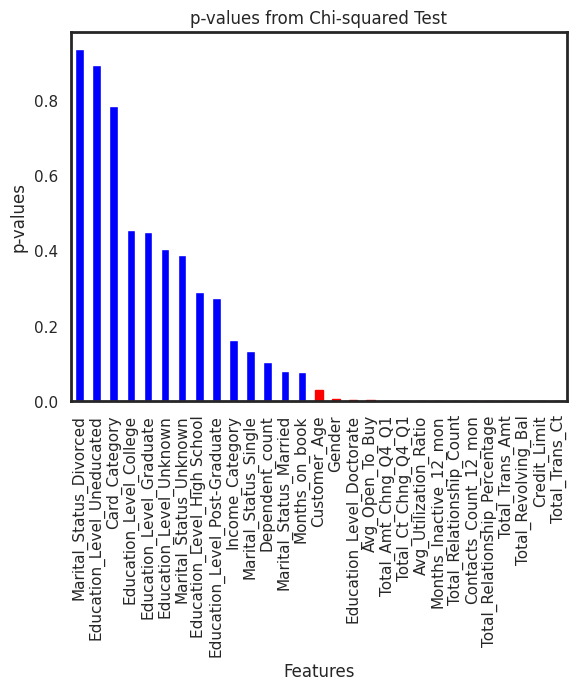

In [57]:
# Plot p-scores
# Code to calculate p_values
p_values = pd.Series(chi_scores[1], index=X.columns)

# Sorting the p-values in descending order
p_values.sort_values(ascending=False, inplace=True)

# Plotting the p-values as a bar plot
ax = p_values.plot(kind='bar', color='blue')

# Highlighting values under 0.05 by changing their color
threshold = 0.05
for bar in ax.patches:
    if bar.get_height() < threshold:
        bar.set_color('red')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('p-values')
plt.title('p-values from Chi-squared Test')
plt.show()

From here we can conclude that starting from customer_age to total_trans_ct all features have significant relation with target variable which is Attrition_Flag.

## Data Preparation for ML

### Split for Cross-Validation

We extract a feature dataframe *X* and a dependent variable *y*.

In [58]:
# Split the Dependent Variable (y) from the Independent Variables (X)
y = df_bankchurners['Attrition_Flag']
X = df_bankchurners.drop(columns=['Attrition_Flag'])

Split the Dataset Into the Training Test and Test Set

[Train Test Split Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

The Train-Test split follows a stratified approach.

*Stratified train-test split* is a technique used in machine learning to split a dataset into training and testing sets while maintaining the same class distribution or proportion of classes in both sets. This is particularly useful when dealing with imbalanced datasets, where the distribution of classes is unequal.

The stratified train-test split ensures that each class is represented in both the training and testing sets in roughly the same proportion as the original dataset. This helps to ensure that the model is trained and evaluated on representative samples from each class, which can lead to more reliable performance evaluation.

The process of performing a stratified train-test split involves the following steps:

1. Identify the feature column that represents the class labels or target variable.
2. Use the train_test_split function from the scikit-learn library with the parameter `stratify` set to the class labels column.
3. Specify the desired test set size or the proportion of the dataset to be allocated for testing.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify=y)

### Feature Scaling

The range of all features should be normalized so that each feature contributes approximately proportionately to the final distance, so we do feature scaling.

In [60]:
# Create an instance of the StandardScaler class
sc = StandardScaler()

In [61]:
# Create a list of non scaled numerical features
non_scaled_num_feature = ['Customer_Age','Dependent_count','Income_Category', 'Card_Category', 'Months_on_book', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Total_Relationship_Percentage','Total_Relationship_Count', 'Avg_Open_To_Buy']

# Check first 5 rows of non-scaled numerical features
X_train[non_scaled_num_feature].head()

Customer_Age  Dependent_count  Income_Category  Card_Category  \
3105          53.0                2                2              0   
3721          44.0                4                0              0   
3389          50.0                3                1              0   
3552          50.0                1                4              0   
398           55.0                0                5              0   

      Months_on_book  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3105            37.0                       3                      4   
3721            37.0                       3                      3   
3389            41.0                       2                      2   
3552            30.0                       2                      3   
398             49.0                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
3105          7282                    0                 0.740   
3721          5826                    0                 0.689   
3389          2563                 1860                 0.680   
3552          9771                 1776                 0.460   
398           3805                 2233                 1.095   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3105             3364              69                0.816   
3721             3756              73                0.921   
3389             3774              83                0.804   
3552             2778              53                0.472   
398              1743              27                0.929   

      Total_Relationship_Percentage  Total_Relationship_Count  Avg_Open_To_Buy  
3105                         13.514                         5             7282  
3721                         10.811                         4             5826  
3389                          9.756                         4              703  
3552                         20.000                         6             7995  
398                          10.204                         5             1572

In [62]:
# Apply Feature Scaling to all the numerical features

# Just fit the training set since we don´t want the test set to be calculated in the mean and std dev
X_train[non_scaled_num_feature] = sc.fit_transform(X_train[non_scaled_num_feature])
X_test[non_scaled_num_feature] = sc.transform(X_test[non_scaled_num_feature])

In [63]:
# Verify first 5 rows of scaled numerical features
X_train[non_scaled_num_feature].head()

Customer_Age  Dependent_count  Income_Category  Card_Category  \
3105      0.836046        -0.269399        -0.062042       -0.24798   
3721     -0.286912         1.270757        -1.416772       -0.24798   
3389      0.461727         0.500679        -0.739407       -0.24798   
3552      0.461727        -1.039477         1.292688       -0.24798   
398       1.085593        -1.809556         1.970052       -0.24798   

      Months_on_book  Months_Inactive_12_mon  Contacts_Count_12_mon  \
3105        0.135588                0.653559               1.395148   
3721        0.135588                0.653559               0.489023   
3389        0.650243               -0.331278              -0.417101   
3552       -0.765057               -0.331278               0.489023   
398         1.679553                0.653559               0.489023   

      Credit_Limit  Total_Revolving_Bal  Total_Amt_Chng_Q4_Q1  \
3105     -0.145161            -1.427199             -0.088665   
3721     -0.306416            -1.427199             -0.321000   
3389     -0.667799             0.852233             -0.362000   
3552      0.130500             0.749291             -1.364231   
398      -0.530246             1.309345              1.528572   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
3105        -0.301008        0.179037             0.442719   
3721        -0.184850        0.349734             0.884164   
3389        -0.179517        0.776479             0.392268   
3552        -0.474651       -0.503754            -1.003540   
398         -0.781342       -1.613289             0.917798   

      Total_Relationship_Percentage  Total_Relationship_Count  Avg_Open_To_Buy  
3105                       0.399965                  0.755506        -0.016169  
3721                      -0.078802                  0.113084        -0.177306  
3389                      -0.265668                  0.113084        -0.744271  
3552                       1.548793                  1.397928         0.062739  
398                       -0.186317                  0.755506        -0.648099

## Model Implementation

### Pre-modeling Analysis

In [64]:
# Get the shape of the fully encoded matrix
print(f'The fully encoded feature matrix has {X_train.shape[1]} features and {X_train.shape[0]} instances.')

The fully encoded feature matrix has 29 features and 8101 instances.


Before modelling, an auxiliary function is defined to print more efficiently some significant performance metrics for the binary classification task.

In [65]:
###########################################################################################################
"""
    This function prints a summary of relevant performance metrics for the challenge's classification task.
    --
    In:
        * y_test: Dependent variable labels for the test set.
        * y_pred: Predicted values for the dependent variables.
    Out:
        * void
"""
###########################################################################################################

def evaluate_classifier(y_test, y_pred) :

  # Set display names to match the predicted variable 'Type' labels
  target_names = ['n', 'y']

  # Print a Classification report with several relevant metric scores per label
  print('Performance metrics summary:\n')
  print(classification_report(y_test, y_pred, target_names=target_names, digits=3))

  # Display the Confusion Matrix
  print('Confusion Matrix:\n')
  ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
  plt.show()

An auxiliary function for plotting the class distribution of a categorial variable is also created.

In [66]:
###########################################################################################################
"""
    This function plots the distribution of the labels for a categorical feature.
    --
    In:
        * y: Feature vector.
    Out:
        * void
"""
###########################################################################################################

def plot_class_distribution(y) :

  # Get the instances count per unique class
  unique, counts = np.unique(y, return_counts=True)
  unique_count = dict(zip(unique, counts))

  # Get the plotting data as lists
  names = list(unique_count.keys())
  values = list(unique_count.values())

  # Display the distribution graph
  plt.bar(range(len(unique_count)), values, tick_label=names)
  plt.show()

As we noticed before in the Data Analysis section, the dependent variable label distribution is quite imbalanced so we plot it directly to strenghten the point that some measures have to be taken to consider this in the model selection.

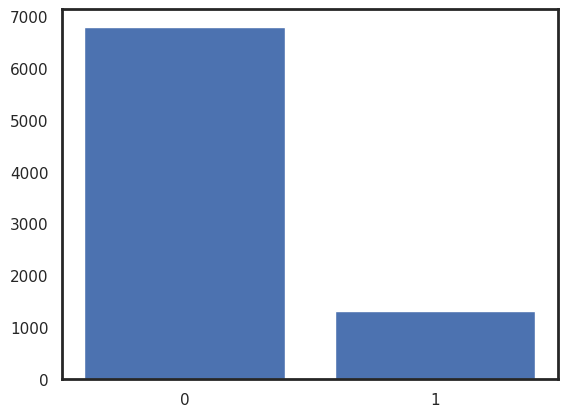

In [67]:
# Plot distribution of dependent variable labels in training set
plot_class_distribution(y_train)

### Single Predictors

Let's evaluate a couple of simple predictors first.

These predictors were chosen since they have characteristics that can help when dealing with an imbalanced predicted class.

* In SVM (Support Vector Machine), you can adjust the cost parameter (C) to penalize misclassifications of the minority class more.
* In Decision Trees you can set the `class_weight` parameter to give more weight to the minority class.

#### Support Vector Machine Classifier

Baseline Model experimentation with RBF kernel.

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.957     0.974     0.965      1701
           y      0.850     0.769     0.808       325

    accuracy                          0.941      2026
   macro avg      0.904     0.872     0.887      2026
weighted avg      0.940     0.941     0.940      2026

Confusion Matrix:



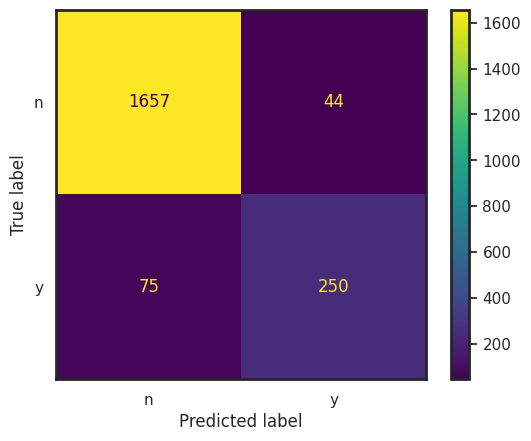

In [68]:
# Create a SVM Classifier, fit the training data and predict 'y'
svm_classifier = SVC(kernel = 'rbf', random_state = 1, gamma=0.1, C=10)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred_svm)

Experiment with parameters C and gamma for a SVM classifier with an RBF kernel.

Best parameters found:
{'C': 1, 'gamma': 0.1}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.946     0.979     0.962      1701
           y      0.868     0.708     0.780       325

    accuracy                          0.936      2026
   macro avg      0.907     0.844     0.871      2026
weighted avg      0.934     0.936     0.933      2026

Confusion Matrix:



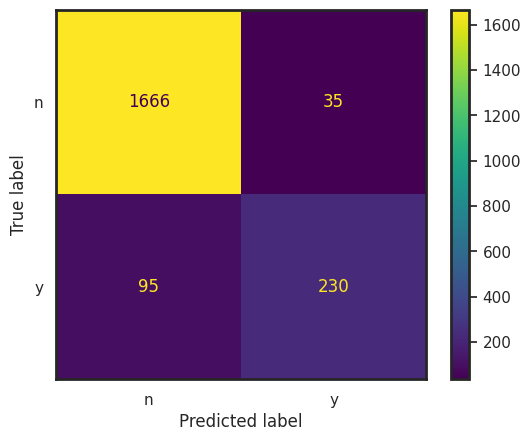

In [69]:
# Create a SVM Classifier
svm_classifier = SVC(random_state = 1, kernel = 'rbf')

# Define a parameter grid for grid search
svm_param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.1, 1, 10]
}

# Perform grid search
svm_grid_search = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid, cv=5)
svm_grid_search.fit(X_train, y_train)
print(f'Best parameters found:\n{svm_grid_search.best_params_}\n')

# Predict 'y'
y_pred = svm_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

#### Random Forest Classifier

[Random Forest Classifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.961     0.986     0.974      1701
           y      0.918     0.791     0.850       325

    accuracy                          0.955      2026
   macro avg      0.939     0.889     0.912      2026
weighted avg      0.954     0.955     0.954      2026

Confusion Matrix:



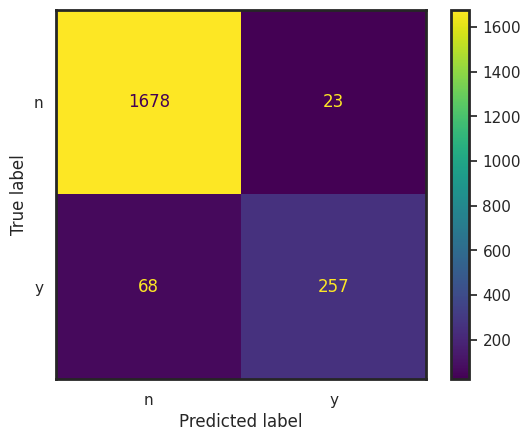

In [70]:
# Create a Random Forest Classifier, fit the training data and predict 'y'
rf_classifier = RandomForestClassifier(n_estimators = 90, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Best parameters found:
{'class_weight': None, 'criterion': 'gini', 'n_estimators': 180}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.964     0.988     0.976      1701
           y      0.929     0.809     0.865       325

    accuracy                          0.960      2026
   macro avg      0.947     0.899     0.921      2026
weighted avg      0.959     0.960     0.958      2026

Confusion Matrix:



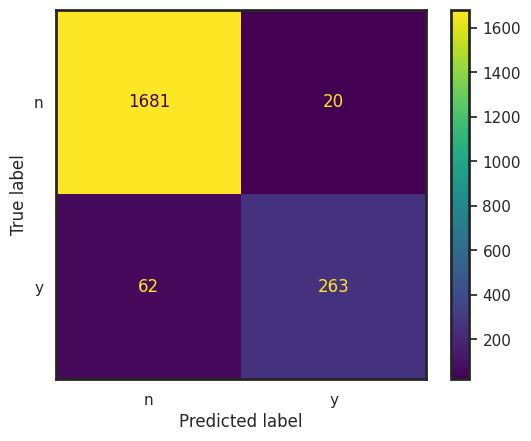

In [71]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state = 0)

# Define a parameter grid for the grid search
rf_param_grid = {
    'n_estimators': [60, 90, 120, 150, 180],
    'criterion': ["gini", "entropy","log_loss"],
    'class_weight': [None, "balanced", "balanced_subsample"]}

# Perform grid search
rf_grid_search = GridSearchCV(estimator=rf_classifier, param_grid=rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
print(f'Best parameters found:\n{rf_grid_search.best_params_}\n')

# Predict 'y'
y_pred = rf_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

#### XGBoost

[XGBoost Documentation](https://xgboost.readthedocs.io/en/stable/parameter.html)

In [72]:
# Count the number of positive and negative examples in the target variable
num_positive = sum(y_train == 0)
num_negative = sum(y_train == 1)

# Set the scale_pos_weight parameter just as XGBoost documentation recommends
scale_pos_weight = num_negative / num_positive
scale_pos_weight

0.19149874981614942

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.983     0.991     0.987      1701
           y      0.952     0.908     0.929       325

    accuracy                          0.978      2026
   macro avg      0.967     0.949     0.958      2026
weighted avg      0.978     0.978     0.978      2026

Confusion Matrix:



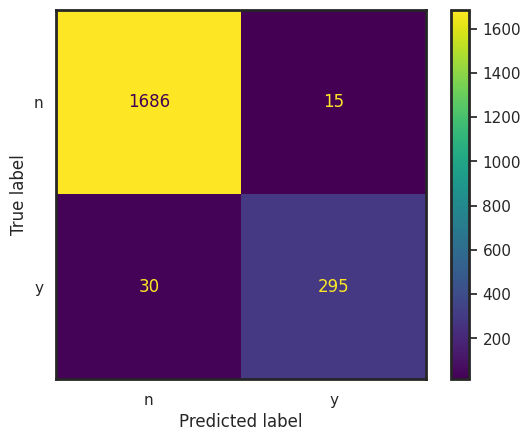

In [73]:
# Create a XGBoost Classifier, fit the training data and predict 'y'
xg_classifier = XGBClassifier(scale_pos_weight=scale_pos_weight)
xg_classifier.fit(X_train, y_train)
y_pred = xg_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

Best parameters found:
{'max_depth': 10, 'n_estimators': 200}

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.983     0.992     0.987      1701
           y      0.958     0.908     0.932       325

    accuracy                          0.979      2026
   macro avg      0.970     0.950     0.960      2026
weighted avg      0.979     0.979     0.979      2026

Confusion Matrix:



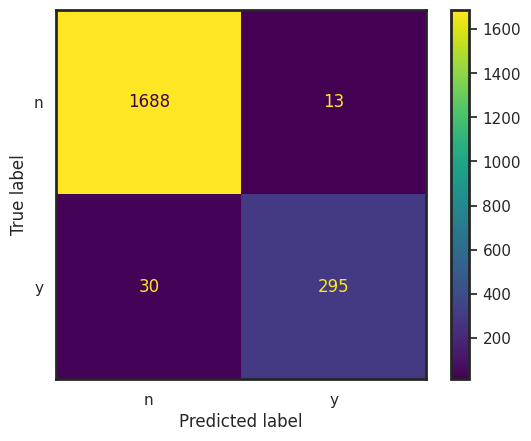

In [74]:
# Create a XGBoost Classifier
xg_classifier = XGBClassifier(scale_pos_weight=scale_pos_weight)

# Define a parameter grid for the grid search
xg_param_grid = {
    'max_depth': [10, 20, None],
    #'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Perform grid search
xg_grid_search = GridSearchCV(estimator=xg_classifier, param_grid=xg_param_grid, cv=5)
xg_grid_search.fit(X_train, y_train)
print(f'Best parameters found:\n{xg_grid_search.best_params_}\n')

# Predict 'y'
y_pred = xg_grid_search.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

XGBoost classifier was the winner of this small classification contest!

A simple SVM classifier can indeed be highly performant and computationally efficient for binary classification tasks, especially when paired with an appropriate kernel and fine-tuned hyperparameters such as C and γ to strike a balance between bias and variance. Decision Trees also show promise in handling class imbalance, especially when employing techniques like weight-balancing.

However, interestingly XGBoost outperformed both Random Forest and SVM classifiers. While SVMs and Decision Trees are solid contenders, XGBoost seems to have offered superior performance, surpassing the other methods in terms of overall metrics.

Moving forward, it might be worth exploring more advanced techniques for handling imbalanced classes, such as undersampling, oversampling (e.g., SMOTE), or generating synthetic samples. Additionally, considering XGBoost's success, further experimentation with ensemble methods, perhaps using SVM predictors as base learners, could be beneficial. Moreover, including logistic regression and neural network classifiers in the model evaluation could provide valuable insights into their performance relative to SVMs and ensemble methods.

##### Cross Validation in Train dataset

All right, we will now perform cross-validation on the train set to check the accuracy.

Performance metrics summary:

              precision    recall  f1-score   support

           n      0.983     0.992     0.987      1701
           y      0.958     0.908     0.932       325

    accuracy                          0.979      2026
   macro avg      0.970     0.950     0.960      2026
weighted avg      0.979     0.979     0.979      2026

Confusion Matrix:



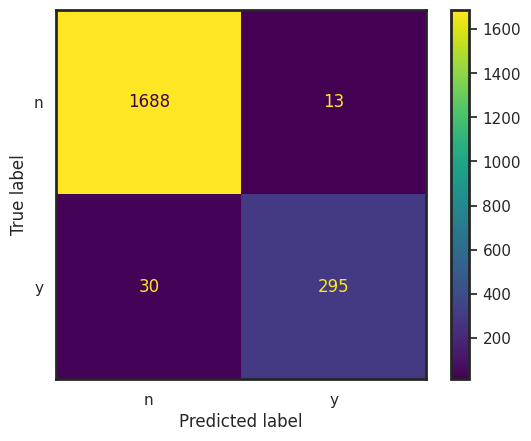

In [75]:
# Create a XGBoost Classifier again with the best hyperparameters, fit the training data and predict 'y'
xg_classifier = XGBClassifier(scale_pos_weight = scale_pos_weight, max_depth = 10, n_estimators = 200)
xg_classifier.fit(X_train, y_train)
y_pred = xg_classifier.predict(X_test)

# Evaluate its performance
evaluate_classifier(y_test, y_pred)

In [76]:
# Initialise the KFold parameters
kfold = KFold(n_splits=5, random_state=7,shuffle = True)

# Perform K-Fold Cross Validation
results = cross_val_score(xg_classifier, X_train, y_train, cv=kfold)

# Print the average results
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 96.31% (0.33%)


Accuracy is good that means our model works quite well without overfitting!

##### Feature Importance

We have plotted the features and sorted them based on their importance.

<Figure size 1500x800 with 0 Axes>

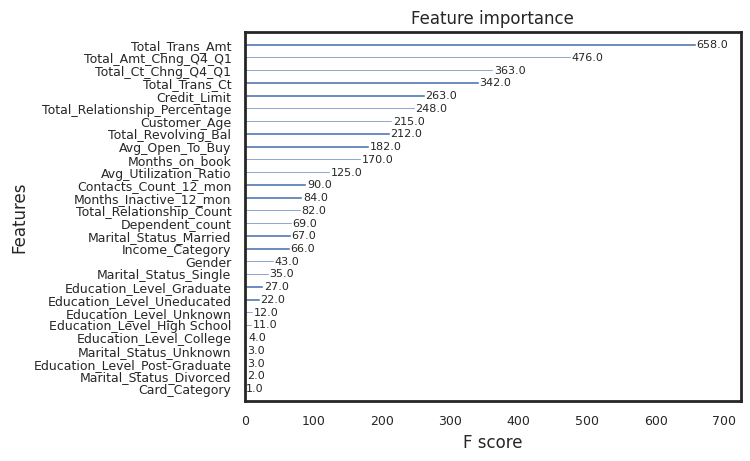

In [77]:
# Set the size of the figure
plt.figure(figsize=(15, 8))

# Plot feature importance
plot = plot_importance(xg_classifier)

# Adjust font size of x and y axis values
plt.tick_params(axis='x', labelsize=9)
plt.tick_params(axis='y', labelsize=9)

# Adjust font size of the total values displayed outside of the bars
for text in plot.texts:
    text.set_fontsize(8)  # Adjust the font size as needed

# Remove gridlines
plt.grid(False)

# Show the plot
plt.show()

Model feature importance plot shows us that the features that we detected earlier with the chi2 test are matching with the above results.

So we can say that total transaction amount, total transaction amount and count changing from Q4 to Q1, total transaction count, credit limit, total relationship percentage ext, these are the features they have significant importance of the customer's attrition.